In [1]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry, SamPredictor
from segment_anything.utils.transforms import ResizeLongestSide


#from pycocotools.coco import COCO


import cv2
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from IPython import display

import torchvision.transforms as transforms
import torch
import torch.nn as nn
from torch.utils.tensorboard.writer import SummaryWriter
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset


import logging
import sys
import json
#import toml
import os
import datetime
import glob

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# REsize de 1024x1024
# ANOTACIONES COCO

In [146]:
# from preprocessing import *
# BASE_PATH = os.getcwd() + "\\data"
# TRAINING_PATH_AMSTERDAM= BASE_PATH + "\\training\\Amsterdam\\GE3T\\"
# TRAINING_PATH_SINGAPORE= BASE_PATH + "\\training\\Singapore\\"
# TRAINING_PATH_UTRECHT= BASE_PATH + "\\training\\Utrecht\\"

# TEST_PATH_AMSTERDAM= BASE_PATH + "\\test\\Amsterdam\\"
# TEST_PATH_SINGAPORE= BASE_PATH + "\\test\\Singapore\\"
# TEST_PATH_UTRECHT= BASE_PATH + "\\test\\Utrecht\\"
# TRAINING_DICT={
#     "pathsFLAIR":[],
#     "pathsT1":[],
#     "mask" :[],
#     "location":[],
#     "ID":[]
# }
# createDictionary(TRAINING_PATH_UTRECHT, TRAINING_DICT,"Utrecht")
# createDictionary(TRAINING_PATH_SINGAPORE, TRAINING_DICT, "Singapore")
# createDictionary(TRAINING_PATH_AMSTERDAM, TRAINING_DICT,"Amsterdam")
# TEST_DICT={
#     "pathsFLAIR":[],
#     "pathsT1":[],
#     "mask" :[],
#     "location":[],
#     "ID":[]
# }
# createDictionary(TEST_PATH_UTRECHT, TEST_DICT,"Utrecht")
# createDictionary(TEST_PATH_SINGAPORE, TEST_DICT,"Singapore")
# createDictionary(os.path.join(TEST_PATH_AMSTERDAM, "GE1T5"), TEST_DICT,"Amsterdam")
# createDictionary(os.path.join(TEST_PATH_AMSTERDAM, "GE3T"), TEST_DICT,"Amsterdam")
# createDictionary(os.path.join(TEST_PATH_AMSTERDAM, "Philips_VU .PETMR_01"), TEST_DICT,"Amsterdam")
# #GUARDAR CADA UNO DE LOS SLICES EN PENDRIVE
# #GUARDAR EN JSON ANOTACIONES

# import os
# import nibabel
# import cv2

# #Carpeta donde se guardarán las imágenes
# output_folder = "d:\\trainingVASCULAR\\MASKS\\"

# #Crea la carpeta de salida si no existe
# os.makedirs(output_folder, exist_ok=True)

# for i, (img_path, mask_path,id) in enumerate(zip(TRAINING_DICT["pathsFLAIR"],TRAINING_DICT["mask"],TRAINING_DICT["ID"])):
#     #Lee la imagen
#     flair= os.path.join(img_path)
#     img = nibabel.load(flair)
#     image_data = img.get_fdata() 

#     mask= os.path.join(mask_path)
#     img = nibabel.load(mask)
#     mask_data = img.get_fdata() 
#     mask_data[mask_data==2]=0

#     #Verifica que la imagen fue leída correctamente
#     if img is None:
#         print(f"Error al leer la imagen: {mask_path}")
#         continue
#     n_slices = image_data.shape[2]
#     lim_inf= int(n_slices*0.1)
#     lim_sup=int(n_slices*0.9) 
#     for i in range(lim_inf,lim_sup):
#         if(cv2.countNonZero(image_data[:,:,i])!=0):
#             file_name = os.path.basename(mask_path)
#             file_name = os.path.splitext(os.path.splitext(file_name)[0])[0]
#             output_path = os.path.join(output_folder, f"{id}{file_name}_slice{i+1}.jpg")
#             cv2.imwrite(output_path,mask_data[:,:,i])


In [2]:
from ICPRpreprocessing import *
BASE_PATH = os.getcwd() + "\\ICPR"
TRAINING_PATH= BASE_PATH + "\\test\\test\\"

#TEST_PATH= BASE_PATH + "/test/"
TRAINING_DICT={
    "pathsFLAIR":[],
    "pathsT1":[],
    "pathsT2":[],
    "mask" :[]
}
createDictionary(TRAINING_PATH, TRAINING_DICT)
print(TRAINING_DICT.get("pathsFLAIR").__getitem__(0))
print(TRAINING_DICT.get("pathsT1").__getitem__(0))
print(TRAINING_DICT.get("pathsT2").__getitem__(0))
print(TRAINING_DICT.get("mask").__getitem__(0))
print(len(TRAINING_DICT.get("pathsFLAIR")))

c:\Users\Aina\OneDrive\Escritorio\White-Matter-Hyperintensity-Segmentation\ICPR\test\test\P54\P54_FLAIR.nii.gz
c:\Users\Aina\OneDrive\Escritorio\White-Matter-Hyperintensity-Segmentation\ICPR\test\test\P54\P54_T1.nii.gz
c:\Users\Aina\OneDrive\Escritorio\White-Matter-Hyperintensity-Segmentation\ICPR\test\test\P54\P54_T2.nii.gz
c:\Users\Aina\OneDrive\Escritorio\White-Matter-Hyperintensity-Segmentation\ICPR\test\test\P54\P54_MASK.nii.gz
22


In [5]:
#GUARDAR CADA UNO DE LOS SLICES EN PENDRIVE
#GUARDAR EN JSON ANOTACIONES

import os
import nibabel
import cv2

#Carpeta donde se guardarán las imágenes
output_folder = "d:\\TEST\\"

#Crea la carpeta de salida si no existe
os.makedirs(output_folder, exist_ok=True)

for i, (img_path, mask_path) in enumerate(zip(TRAINING_DICT["pathsFLAIR"],TRAINING_DICT["mask"])):
    #Lee la imagen
    flair= os.path.join(img_path)
    img = nibabel.load(flair)
    image_data = img.get_fdata() 

    # mask= os.path.join(mask_path)
    # img = nibabel.load(mask)
    # mask_data = img.get_fdata() 

    #Verifica que la imagen fue leída correctamente
    if img is None:
        print(f"Error al leer la imagen: {mask_path}")
        continue
    for i in range(0,182):
        if(cv2.countNonZero(image_data[:,:,i])!=0):
            file_name = os.path.basename(img_path)
            file_name = os.path.splitext(os.path.splitext(file_name)[0])[0]
            output_path = os.path.join(output_folder, f"{file_name}_slice{i+1}.jpg")
            cv2.imwrite(output_path, image_data[:,:,i])


In [150]:
import numpy as np
import cv2
from pycocotools import mask as m
import json
import os

def create_coco_annotation(mask_path, image_id, category_id, annotation_id_start=1):
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    annotations = []
    annotation_id = annotation_id_start
    for i, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        if area == 0.0:  # Skip small areas that may cause issues
            continue
        x, y, w, h = cv2.boundingRect(contour)
        bbox = [float(x), float(y), float(w), float(h)]
        segmentation = contour.flatten().tolist()
        annotation = {
            "area": float(area),
            "bbox": bbox,
            "category_id": category_id,
            "id": annotation_id,
            "ignore": 0,
            "image_id": image_id,
            "iscrowd": 0,
            "segmentation": [segmentation],
                 
        }
        annotations.append(annotation)
        annotation_id += 1    
    return annotations

def create_coco_dataset(masks_folder):
    dataset = {
        "images":[],
        "annotations": [],
    }
    image_id = 1
    annotation_id = 1
    for image_filename in os.listdir(masks_folder):
        mask_path = os.path.join(masks_folder, image_filename)
        annotations = create_coco_annotation(mask_path, image_id, category_id=1, annotation_id_start=annotation_id)
        file_name = image_filename.replace('wmh','FLAIR')
        image=cv2.imread(os.path.join('d:\\testVASCULAR\\',file_name))
        height, width = image.shape[:2]
        dataset['images'].append({
                    "file_name": file_name,
                    "id": image_id,
                    "height": height,
                    "width": width
                })
        dataset['annotations'].extend(annotations)
        annotation_id += len(annotations)
        image_id += 1
    return dataset


In [151]:
# Carpeta con las imágenes y máscaras
images_folder = "d:\\testVASCULAR"
masks_folder = "d:\\testVASCULAR\\MASKS"

coco_dataset = create_coco_dataset(masks_folder)

# Guardar el archivo JSON con las anotaciones COCO
with open('d:\\testVASCULAR\\annotations.json', 'w') as f:
    json.dump(coco_dataset, f)

In [ ]:
# # Carpeta con las imágenes y máscaras
# images_folder = "d:\\TRAIN"
# masks_folder = "d:\\TRAIN\\MASKS"

# coco_dataset = create_coco_dataset(masks_folder)

# # Guardar el archivo JSON con las anotaciones COCO
# with open('d:\\TRAIN\\annotations.json', 'w') as f:
#     json.dump(coco_dataset, f)

## SET

In [3]:

from torch.types import Device
#data
global TRAIN
global TEST
global ANNOT

# # TODO: Put your path here !!!!
# TRAIN = "d:\\TRAIN"
# #TEST = os.path.join("/content/drive/MyDrive/ColabNotebooks/finetunesam/test")
# ANNOT = "annotations.json"
TRAIN = "d:\\trainingVASCULAR"
ANNOT = "annotations.json"
TEST = "d:\\testVASCULAR"
ANNOT = "annotations.json"
#model
global BATCH_SIZE
global EPOCHS
global LR
global WEIGHT_DECAY
global DEVICE

# TODOD adjust, if needed!!!!
BATCH_SIZE = 10
EPOCHS = 1
LR = 0.001
WEIGHT_DECAY = 0.0005
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)

# loss
global ALPHA
global GAMMA
ALPHA = 0.8
GAMMA = 2
EVALUATE=False

cuda


In [4]:
from pycocotools.coco import COCO
class COCODataset(Dataset):
    """
    A PyTorch Dataset to load data from a json file in COCO format.

    ...
    Attributes
    ----------
    root_dir : str
        the root directory containing the images and annotations
    annotation_file : str
        name of the json file containing the annotations (in root_dir)
    transform : callable
        a function/transform to apply to each image

    Methods
    -------
    __getitem__(idx)
        returns the image, image path, and masks for the given index
    buid_total_mask(masks)
        combines the masks into a single mask
    """


    def __init__(self, root_dir, annotation_file, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.coco = COCO(annotation_file)
        self.image_ids = list(self.coco.imgs.keys())

        # Filter out image_ids without any annotations
        self.image_ids = [image_id for image_id in self.image_ids if len(self.coco.getAnnIds(imgIds=image_id)) > 0]

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        image_id = self.image_ids[idx]
        image_info = self.coco.loadImgs(image_id)[0]
        image_path = os.path.join(self.root_dir, image_info['file_name'])

        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        ann_ids = self.coco.getAnnIds(imgIds=image_id)
        anns = self.coco.loadAnns(ann_ids)
        bboxes = []
        masks = []

        for ann in anns:
            x, y, w, h = ann['bbox']
            bboxes.append([x, y, x + w, y + h])
            mask = self.coco.annToMask(ann)
            masks.append(mask)

        if self.transform:
            image, masks, bboxes = self.transform(image, masks, np.array(bboxes))

        bboxes = np.stack(bboxes, axis=0)
        masks = np.stack(masks, axis=0)
        return image, image_path, torch.tensor(masks).float()

    def get_totalmask(self, masks):
        """get all masks in to one image
        ARGS:
            masks (List[Tensor]): list of masks
        RETURNS:
            total_gt (Tensor): all masks in one image

        """
        total_gt = torch.zeros_like(masks[0][0,:,:])
        for k in range(len(masks[0])):
            total_gt += masks[0][k,:,:]
        return total_gt



class ResizeAndPad:
    """
    Resize and pad images and masks to a target size.

    ...
    Attributes
    ----------
    target_size : int
        the target size of the image
    transform : ResizeLongestSide
        a transform to resize the image and masks
    """

    def __init__(self, target_size):
        self.target_size = target_size
        self.transform = ResizeLongestSide(target_size)
        self.to_tensor = transforms.ToTensor()

    def __call__(self, image, masks, bboxes):
        # Resize image and masks
        og_h, og_w, _ = image.shape
        image = self.transform.apply_image(image)
        masks = [torch.tensor(self.transform.apply_image(mask)) for mask in masks]
        image = self.to_tensor(image)

        # Pad image and masks to form a square
        _, h, w = image.shape
        max_dim = max(w, h)
        pad_w = (max_dim - w) // 2
        pad_h = (max_dim - h) // 2

        padding = (pad_w, pad_h, max_dim - w - pad_w, max_dim - h - pad_h)
        image = transforms.Pad(padding)(image)
        masks = [transforms.Pad(padding)(mask) for mask in masks]

        # Adjust bounding boxes
        bboxes = self.transform.apply_boxes(bboxes, (og_h, og_w))
        bboxes = [[bbox[0] + pad_w, bbox[1] + pad_h, bbox[2] + pad_w, bbox[3] + pad_h] for bbox in bboxes]

        return image, masks, bboxes


def load_datasets(img_size):
    """ load the training and validation datasets in PyTorch DataLoader objects
    ARGS:
        img_size (Tuple(int, int)): image size
    RETURNS:
        train_dataloader (DataLoader): training dataset
        val_dataloader (DataLoader): validation dataset

    """
    transform = ResizeAndPad(img_size)
    traindata = COCODataset(root_dir=TRAIN,
                        annotation_file=os.path.join(TRAIN, ANNOT),
                        transform=transform)
    valdata = COCODataset(root_dir=TEST,
                      annotation_file=os.path.join(TEST, ANNOT),
                      transform=transform)
    train_dataloader = DataLoader(traindata,
                                  batch_size=BATCH_SIZE,
                                  shuffle=True,
                                  num_workers=1)
    val_dataloader = DataLoader(valdata,
                                batch_size=BATCH_SIZE,
                                shuffle=True,
                                num_workers=1)
    return train_dataloader,val_dataloader



In [5]:
trainloader, validloader = load_datasets(240)
sample_img = trainloader.dataset[0][0]
sample_mask = trainloader.dataset[0][2]

loading annotations into memory...
Done (t=0.39s)
creating index...
index created!
loading annotations into memory...
Done (t=0.39s)
creating index...
index created!


In [6]:
print(f'shape of sample_img: {sample_img.shape}')
print(f'shape fo sample_mask: {sample_mask.shape}')

shape of sample_img: torch.Size([3, 240, 240])
shape fo sample_mask: torch.Size([1, 240, 240])


In [156]:
import matplotlib.patches as patches
def visualize_example(idx):
        """
        Visualize a single example from the dataset.

        Parameters
        ----------
        idx : int
            The index of the image to visualize.
        """
        image, image_path, masks = trainloader.dataset[idx]

        # Convert the image tensor to numpy array
        image = image.permute(1, 2, 0).cpu().numpy()

        # Create a plot
        fig, ax = plt.subplots(1, 1, figsize=(12, 12))
        ax.imshow(image)
        ax.set_title(f"Image: {image_path}")

        # Overlay each mask
        for i in range(masks.shape[0]):
            m = masks[i].cpu().numpy()
            cmap = plt.cm.jet
            cmap.set_under(color='none')
            ax.imshow(m, cmap=cmap, alpha=0.5)  # Use a colormap for the mask

        # Draw bounding boxes
        ann_ids = trainloader.dataset.coco.getAnnIds(imgIds=trainloader.dataset.image_ids[idx])
        anns = trainloader.dataset.coco.loadAnns(ann_ids)
        for ann in anns:
            bbox = ann['bbox']
            x, y, w, h = bbox
            rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

        plt.show()


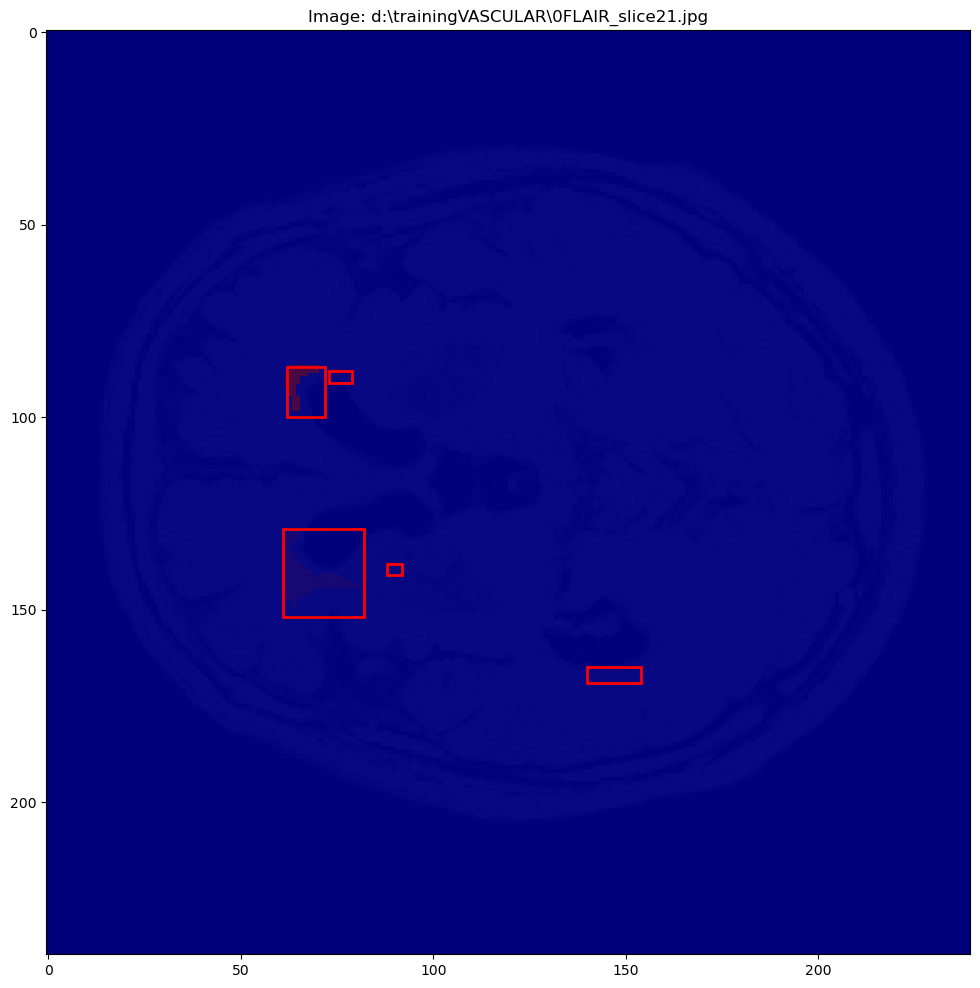

In [160]:
visualize_example(4)

FileNotFoundError: No such file or no access: 'c:/Users/Aina/OneDrive/Escritorio/White-Matter-Hyperintensity-Segmentation/ICPR/test/test/0/wmh.nii.gz'

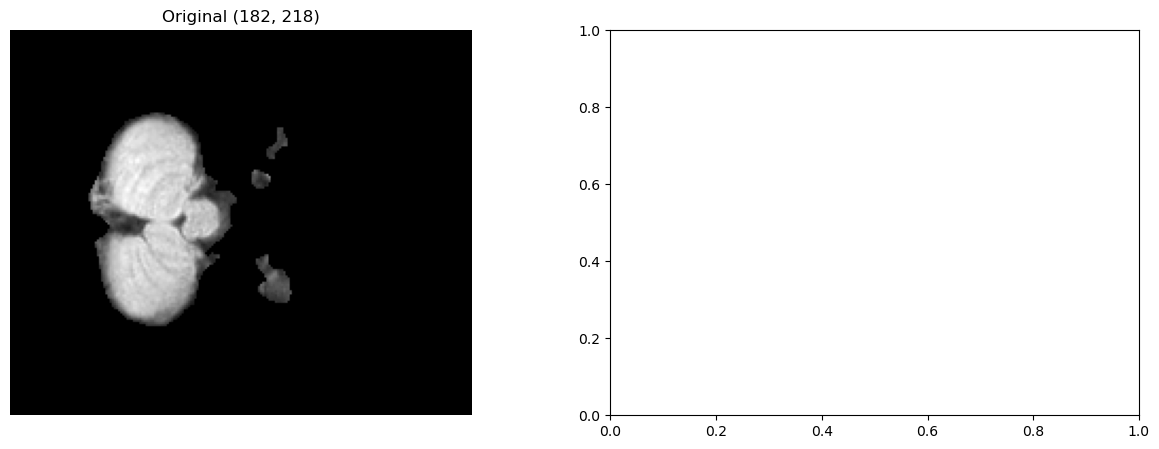

In [3]:
import nibabel
fig,axs = plt.subplots(1, 2, figsize=(15,5))
flair= os.path.join(TRAINING_PATH_UTRECHT, "0","pre","FLAIR.nii.gz")
img = nibabel.load(flair)
image_data = img.get_fdata() 
image_orig=image_data[:, :,21]
axs[0].imshow(image_orig, cmap='gray')
axs[0].set_title("Original %s" %(image_orig.shape,))
axs[0].axis('off')
mask= os.path.join(TRAINING_PATH_UTRECHT, "0","wmh.nii.gz")
img = nib.load(mask)
image_data = img.get_fdata() 
image_data[image_data==2] =0

axs[1].imshow(image_data[:, :,21], cmap='gray')
axs[1].set_title("MASK")
axs[1].axis('off')

(-0.5, 217.5, 181.5, -0.5)

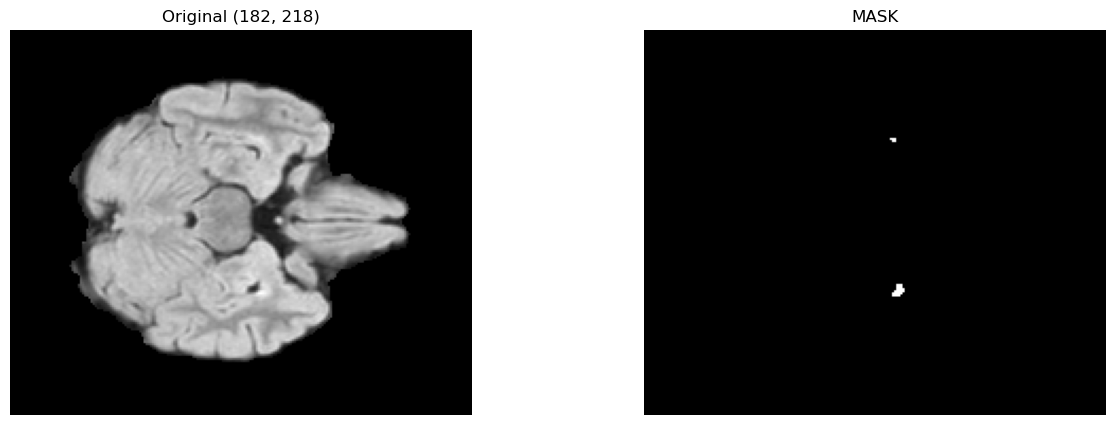

In [58]:
# import nibabel
# fig,axs = plt.subplots(1, 2, figsize=(15,5))
# flair= os.path.join(TRAINING_PATH, "","T1","P1_T1_FLAIR.nii.gz")
# img = nibabel.load(flair)
# image_data = img.get_fdata() 
# image_orig=image_data[:, :,48]
# axs[0].imshow(image_orig, cmap='gray')
# axs[0].set_title("Original %s" %(image_orig.shape,))
# axs[0].axis('off')
# mask= os.path.join(TRAINING_PATH, "P1","T1","P1_T1_MASK.nii.gz")
# img = nib.load(mask)
# image_data = img.get_fdata() 

# axs[1].imshow(image_data[:, :,48], cmap='gray')
# axs[1].set_title("MASK")
# axs[1].axis('off')

## TRAIN

In [2]:
import torch.nn as nn
class ModelSimple(nn.Module):
    """
    Wrapper for the sam model to to fine-tune the model on a new dataset

    ...
    Attributes:
    -----------
    freeze_encoder (bool): freeze the encoder weights
    freeze_decoder (bool): freeze the decoder weights
    freeze_prompt_encoder (bool): freeze the prompt encoder weights
    transform (ResizeLongestSide): resize the images to the model input size

    Methods:
    --------
    setup(): load the model and freeze the weights
    forward(images, points): forward pass of the model, returns the masks and iou_predictions
    """

    def __init__(self, freeze_encoder=True, freeze_decoder=False, freeze_prompt_encoder=True):
        super().__init__()
        self.freeze_encoder = freeze_encoder
        self.freeze_decoder = freeze_decoder
        self.freeze_prompt_encoder = freeze_prompt_encoder
        # we need this to make the input image size compatible with the model
        self.transform = ResizeLongestSide(1024) #This is 1024, because sam was trained on 1024x1024 images

    def setup(self):
        # TODO your path here
        self.model = sam_model_registry['vit_b']('sam_vit_b_01ec64.pth')
        # to speed up training time, we normally freeze the encoder and decoder
        if self.freeze_encoder:
            for param in self.model.image_encoder.parameters():
                param.requires_grad = False
        if self.freeze_prompt_encoder:
            for param in self.model.prompt_encoder.parameters():
                param.requires_grad = False
        if self.freeze_decoder:
            for param in self.model.mask_decoder.parameters():
                param.requires_grad = False
        self.transfrom = ResizeLongestSide(self.model.image_encoder.img_size)
    def forward(self, images):
        _, _, H, W = images.shape # batch, channel, height, width
        image_embeddings = self.model.image_encoder(images) # shape: (1, 256, 64, 64)
        # get prompt embeddings without acutally any prompts (uninformative)
        sparse_embeddings, dense_embeddings = self.model.prompt_encoder(
            points=None,
            boxes=None,
            masks=None,
        )

        # get low resolution masks and iou predictions
        # mulitmask_output=False means that we only get one mask per image,
        # otherwise we would get three masks per image
        low_res_masks, iou_predictions = self.model.mask_decoder(
            image_embeddings=image_embeddings,
            image_pe=self.model.prompt_encoder.get_dense_pe(),
            sparse_prompt_embeddings=sparse_embeddings, # sparse_embeddings shape: (1, 0, 256)
            dense_prompt_embeddings=dense_embeddings, # dense_embeddings shape: (1, 256, 256)
            multimask_output=False,
        )
        # postprocess the masks to get the final masks and resize them to the original image size
        masks = F.interpolate(
            low_res_masks, # shape: (1, 1, 256, 256)
            (H, W),
            mode="bilinear",
            align_corners=False,
        )
        # shape masks after interpolate: torch.Size([1, 1, 1024, 1024])
        return masks, iou_predictions

In [3]:
import torch.nn as nn
import torch.nn.functional as F
import torch

def get_totalmask(masks):
    """get all masks in to one image
    ARGS:
        masks (torch.Tensor): shape: (N, H, W) where N is the number of masks
                              masks H,W is usually 1024,1024
    RETURNS:
        total_gt (torch.Tensor): all masks in one image

    """
    total_gt = torch.zeros_like(masks[0,:,:])
    for k in range(len(masks)):
        total_gt += masks[k,:,:]
    return total_gt



class FocalLoss(nn.Module):
    """ Computes the Focal loss. """

    def __init__(self):
        super().__init__()

    def forward(self, inputs, targets):

        inputs = inputs.flatten(0,2)
        BCE = F.binary_cross_entropy_with_logits(inputs, targets, reduction='mean')
        BCE_EXP = torch.exp(-BCE)
        focal_loss = ALPHA * (1 - BCE_EXP)**GAMMA * BCE

        return focal_loss


class DiceLoss(nn.Module):
    """ Computes the Dice loss. """

    def __init__(self):
        super().__init__()

    def forward(self, inputs, targets, smooth=1):
        inputs = F.sigmoid(inputs)
        inputs = inputs.flatten(0,2)
        intersection = (inputs * targets).sum()
        dice = (2. * intersection + smooth) / \
            (inputs.sum() + targets.sum() + smooth)
        return 1 - dice



def criterion(x, y):
    """ Combined dice and focal loss.
    ARGS:
        x: (torch.Tensor) the model output
        y: (torch.Tensor) the target
    RETURNS:
        (torch.Tensor) the combined loss

    """
    focal, dice = FocalLoss(), DiceLoss()
    y = y.to(DEVICE)
    x = x.to(DEVICE)
    return 20 * focal(x, y) + dice(x, y)


def train_one_epoch(model, trainloader, optimizer, epoch_idx, tb_writer):
    """ Runs forward and backward pass for one epoch and returns the average
    batch loss for the epoch.
    ARGS:
        model: (nn.Module) the model to train
        trainloader: (torch.utils.data.DataLoader) the dataloader for training
        optimizer: (torch.optim.Optimizer) the optimizer to use for training
        epoch_idx: (int) the index of the current epoch
        tb_writer: (torch.utils.tensorboard.writer.SummaryWriter) the tensorboard writer
    RETURNS:
        last_loss: (float) the average batch loss for the epoch

    """
    running_loss = 0.
    for i, (image, path, masks) in enumerate(trainloader):

        image = image.to(DEVICE)
        optimizer.zero_grad()
        pred, _ = model(image)
        masks = masks[0].to(DEVICE)
        total_mask = get_totalmask(masks)
        pred = pred.to(DEVICE)
        loss = criterion(pred, total_mask)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    i = len(trainloader)
    last_loss = running_loss / i
    print(f'batch_loss for batch {i}: {last_loss}')
    tb_x = epoch_idx * len(trainloader) + i + 1
    tb_writer.add_scalar('Loss/train', last_loss, tb_x)
    running_loss = 0.
    return last_loss


def train_fn():
    """ Trains the model for the given number of EPOCHS."""
    bestmodel_path = ""
    model = ModelSimple()
    model.setup()
    model.to(DEVICE)
    img_size = model.model.image_encoder.img_size
    trainloader, validloader = load_datasets(img_size=img_size)
    optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
    best_valid_loss = float('inf')
    timestamp_writer = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    writer = SummaryWriter(os.path.join("d:\\", f"trainer_{timestamp_writer}")) # TODO your path here
    for epch in range(EPOCHS): # type: ignore
        running_vloss = 0.
        model.train(True)
        avg_batchloss = train_one_epoch(
            model, trainloader, optimizer, epch, writer)
        if not EVALUATE: # type: ignore
            continue
        with torch.no_grad():
            for images, path, masks in validloader:
                model.to(DEVICE)
                images = images.to(DEVICE)
                masks = masks[0].to(DEVICE)
                total_mask = get_totalmask(masks)
                total_mask = total_mask.to(DEVICE)
                model.eval()
                preds, iou = model(images)
                preds = preds.to(DEVICE)
                vloss = criterion(preds, total_mask)
                running_vloss += vloss.item()
        print(f'epoch: {epch}, validloss: {running_vloss}')
        avg_vloss = running_vloss / len(validloader)
        # save model
        print(f'epoch: {epch}, validloss: {running_vloss}')
        print(f'best valid loss: {best_valid_loss}')
        if running_vloss < best_valid_loss:
          best_model = model
        plt.figure(figsize=(12, 4))
        pl.plot(avg_batchloss, label="train")
        pl.plot(running_vloss, label="validation")
        pl.legend()
        pl.xlim(0, epch)
        pl.xticks(range(0,epch,1),range(1,epch+1,1))
        
        display.clear_output(wait=True)
        display.display(pl.gcf())
        plt.close()  
    return best_model

In [11]:
model = train_fn()
torch.save(model.state_dict(), os.path.join('d:\\','finetunet.pth')) # TODO your path here

loading annotations into memory...
Done (t=0.22s)
creating index...
index created!
loading annotations into memory...
Done (t=0.11s)
creating index...
index created!


In [22]:
import torch

try:
    checkpoint = torch.load('finetunet2.pth')
    print("Checkpoint loaded successfully")
except Exception as e:
    print(f"Error loading checkpoint: {e}")

Error loading checkpoint: PytorchStreamReader failed reading zip archive: failed finding central directory


In [23]:
#use my custom SAM model wrapper class
model_trained= ModelSimple()
model_trained.setup()
model_trained.load_state_dict(torch.load('./finetunet2.pth'))

RuntimeError: PytorchStreamReader failed reading zip archive: failed finding central directory

In [ ]:
with torch.no_grad():
   model_trained.load_state_dict(torch.load('d:\\finetuned.pth', map_location=torch.device('cpu')))
   model_trained.eval()
   img_size = model_trained.model.image_encoder.img_size
   print(f'img_size: {img_size}')
   print(f'img_size: {model_trained.model.image_encoder.img_size}')
    #TODO your code here

# INFERENCIA

In [2]:
import os
import glob
import monai
import torch
import numpy as np 
from PIL import Image
from tqdm import tqdm
import nibabel as nib
from statistics import mean
from torch.optim import Adam
#from natsort import natsorted
import matplotlib.pyplot as plt
from transformers import SamModel 
import matplotlib.patches as patches
from transformers import SamProcessor
from IPython.display import clear_output
from torch.utils.data import Dataset, DataLoader
from torch.nn.functional import threshold, normalize

%matplotlib inline

from monai.transforms import (
    EnsureChannelFirstd,
    EnsureTyped,
    Compose,
    CropForegroundd,
    CopyItemsd,
    LoadImaged,
    CenterSpatialCropd,
    Invertd,
    OneOf,
    Orientationd,
    MapTransform,
    NormalizeIntensityd,
    RandSpatialCropSamplesd,
    CenterSpatialCropd,
    RandSpatialCropd,
    SpatialPadd,
    ScaleIntensityRanged,
    Spacingd,
    RepeatChanneld,
    ToTensord,
)

c:\Users\Aina\miniconda3\envs\tfg_aina\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")
processor

SamProcessor:
- image_processor: SamImageProcessor {
  "_valid_processor_keys": [
    "images",
    "segmentation_maps",
    "do_resize",
    "size",
    "mask_size",
    "resample",
    "do_rescale",
    "rescale_factor",
    "do_normalize",
    "image_mean",
    "image_std",
    "do_pad",
    "pad_size",
    "mask_pad_size",
    "do_convert_rgb",
    "return_tensors",
    "data_format",
    "input_data_format"
  ],
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_pad": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "SamImageProcessor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "mask_pad_size": {
    "height": 256,
    "width": 256
  },
  "mask_size": {
    "longest_edge": 256
  },
  "pad_size": {
    "height": 1024,
    "width": 1024
  },
  "processor_class": "SamProcessor",
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "longest_edge": 1024
  }
}


{
  "

In [4]:
def get_bounding_box(ground_truth_map):
    '''
    This function creates varying bounding box coordinates based on the segmentation contours as prompt for the SAM model
    The padding is random int values between 5 and 20 pixels
    '''
 
    if len(np.unique(ground_truth_map)) > 1:

        # get bounding box from mask
        y_indices, x_indices = np.where(ground_truth_map > 0)
        x_min, x_max = np.min(x_indices), np.max(x_indices)
        y_min, y_max = np.min(y_indices), np.max(y_indices)
        
        # add perturbation to bounding box coordinates
        H, W = ground_truth_map.shape
        x_min = max(0, x_min - np.random.randint(5, 20))
        x_max = min(W, x_max + np.random.randint(5, 20))
        y_min = max(0, y_min - np.random.randint(5, 20))
        y_max = min(H, y_max + np.random.randint(5, 20))
        
        bbox = [x_min, y_min, x_max, y_max]

        return bbox
    else:
        return [0, 0, 256, 256] # if there is no mask in the array, set bbox to image size

In [94]:
import numpy as np

def get_bounding_boxes(ground_truth_map):
    '''
    Esta función crea cajas delimitadoras variables basadas en los contornos de segmentación presentes en el mapa de verdad terrestre.
    El relleno es un valor entero aleatorio entre 5 y 20 píxeles.
    '''

    bounding_boxes = []

    if len(np.unique(ground_truth_map)) > 1:
        # Encuentra todos los contornos en el mapa de verdad terrestre
        ground_truth_map = ground_truth_map.cpu().numpy()
        contours, _ = cv2.findContours((ground_truth_map > 0).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for contour in contours:
            # Calcula la caja delimitadora para cada contorno
            x, y, w, h = cv2.boundingRect(contour)

            # Agrega perturbación a las coordenadas de la caja delimitadora
            x_min = max(0, x - np.random.randint(5, 20))
            x_max = min(ground_truth_map.shape[1], x + w + np.random.randint(5, 20))
            y_min = max(0, y - np.random.randint(5, 20))
            y_max = min(ground_truth_map.shape[0], y + h + np.random.randint(5, 20))

            # Agrega la caja delimitadora a la lista de cajas delimitadoras
            bounding_boxes.append([x_min, y_min, x_max, y_max])

        return bounding_boxes
    else:
        # Si no hay contornos (todos los píxeles son iguales en el mapa de verdad terrestre),
        # devuelve una caja delimitadora predeterminada
        return [[0, 0, 256, 256]]


In [120]:
class SAMDataset(Dataset):
    def __init__(self, image_paths, mask_paths, processor):
        
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.processor = processor
        self.transforms = transforms = Compose([
            
            
            # reorient images for consistency and visualization
            Orientationd(keys=['img', 'label'], axcodes='RA'),
            
            # resample all training images to a fixed spacing
            Spacingd(keys=['img', 'label'], pixdim=(1.5, 1.5), mode=("bilinear", "nearest")),
            
            # rescale image and label dimensions to 256x256 
            CenterSpatialCropd(keys=['img', 'label'], roi_size=(256,256)),
            
            # scale intensities to 0 and 255 to match the expected input intensity range
            ScaleIntensityRanged(keys=['img'], a_min=0, a_max=2000, 
                          b_min=0.0, b_max=255.0, clip=False), 
            
            #ScaleIntensityRanged(keys=['label'], a_min=0, a_max=255, 
            #              b_min=0.0, b_max=1.0, clip=True), 

            SpatialPadd(keys=["img", "label"], spatial_size=(256,256))
        ])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        mask_path = self.mask_paths[idx]
        
        # create a dict of images and labels to apply Monai's dictionary transforms
        data_dict = self.transforms({'img': image_path, 'label': mask_path})

        # squeeze extra dimensions
        image = data_dict['img'].squeeze()
        ground_truth_mask = data_dict['label'].squeeze()

        # convert to int type for huggingface's models expected inputs
        image = image.astype(np.uint8)

        # convert the grayscale array to RGB (3 channels)
        array_rgb = np.dstack((image, image, image))
        
        # convert to PIL image to match the expected input of processor
        image_rgb = Image.fromarray(array_rgb)
        
        ground_truth_mask[ground_truth_mask== 2] = 0
        
        prompt = get_bounding_box(ground_truth_mask)
        inputs = self.processor(image_rgb, input_boxes=[[prompt]], return_tensors="pt")

        # prompt = get_bounding_boxes(ground_truth_mask)
        # # prepare image and prompt for the model
        # inputs = self.processor(image_rgb, input_boxes=[prompt], return_tensors="pt")

        # remove batch dimension which the processor adds by default
        inputs = {k: v.squeeze(0) for k, v in inputs.items()}

        # add ground truth segmentation (ground truth image size is 256x256)
        inputs["ground_truth_mask"] = torch.from_numpy(ground_truth_mask.astype(np.int8))

        return inputs

In [7]:
from preprocessing import *
BASE_PATH = os.getcwd() + "\\data"
TRAINING_PATH_AMSTERDAM= BASE_PATH + "\\training\\Amsterdam\\GE3T\\"
TRAINING_PATH_SINGAPORE= BASE_PATH + "\\training\\Singapore\\"
TRAINING_PATH_UTRECHT= BASE_PATH + "\\training\\Utrecht\\"

TEST_PATH_AMSTERDAM= BASE_PATH + "\\test\\Amsterdam\\"
TEST_PATH_SINGAPORE= BASE_PATH + "\\test\\Singapore\\"
TEST_PATH_UTRECHT= BASE_PATH + "\\test\\Utrecht\\"
TRAINING_DICT={
    "pathsFLAIR":[],
    "pathsT1":[],
    "mask" :[],
    "location":[],
    "ID":[]
}
createDictionary(TRAINING_PATH_UTRECHT, TRAINING_DICT,"Utrecht")
createDictionary(TRAINING_PATH_SINGAPORE, TRAINING_DICT, "Singapore")
createDictionary(TRAINING_PATH_AMSTERDAM, TRAINING_DICT,"Amsterdam")
TEST_DICT={
    "pathsFLAIR":[],
    "pathsT1":[],
    "mask" :[],
    "location":[],
    "ID":[]
}
createDictionary(TEST_PATH_UTRECHT, TEST_DICT,"Utrecht")
createDictionary(TEST_PATH_SINGAPORE, TEST_DICT,"Singapore")
createDictionary(os.path.join(TEST_PATH_AMSTERDAM, "GE1T5"), TEST_DICT,"Amsterdam")
createDictionary(os.path.join(TEST_PATH_AMSTERDAM, "GE3T"), TEST_DICT,"Amsterdam")
createDictionary(os.path.join(TEST_PATH_AMSTERDAM, "Philips_VU .PETMR_01"), TEST_DICT,"Amsterdam")

In [71]:
def slices(dict):
    data={
        "images":[],
        "mask":[],
    }
    for path, label in zip(dict['pathsFLAIR'], dict['mask']):
        img = nib.load(path)
        image= img.get_fdata() 

        lab = nib.load(label)
        label_img =  lab.get_fdata()
        label_img[label_img==2]=0

        n_slices=image.shape[2]
        lim_inf= int(n_slices*0.1)
        lim_sup=int(n_slices*0.9)
        for ii in range(lim_inf,lim_sup):
            im = image[:, :, ii]
            lab=label_img[:, :, ii]
            #eliminar slices en los que no haya que segmentar nada también
            if(cv2.countNonZero(lab)!=0):
                im = np.expand_dims(im, axis=0)
                lab = np.expand_dims(lab, axis=0)
                data["images"].append(im)
                data["mask"].append(lab)
    return data              

In [121]:
# train_data, val_data = getIDs(TRAINING_DICT)

# train = slices(train_data)
# val  = slices(val_data)
test = slices(TEST_DICT)

In [122]:
print(len(test["images"]))
print(test["images"][0].shape)

2587
(1, 240, 240)


In [123]:
# train_dataset = SAMDataset(image_paths=train['images'], mask_paths=train['mask'], processor=processor)
# train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)

# val_dataset = SAMDataset(image_paths=val['images'], mask_paths=val['mask'], processor=processor)
# val_dataloader = DataLoader(val_dataset, batch_size=1, shuffle=True)

test_dataset= SAMDataset(image_paths=test['images'], mask_paths=test['mask'], processor=processor)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)


pixel_values torch.Size([3, 1024, 1024])
original_sizes torch.Size([2])
reshaped_input_sizes torch.Size([2])
input_boxes torch.Size([7, 4])
ground_truth_mask torch.Size([256, 256])


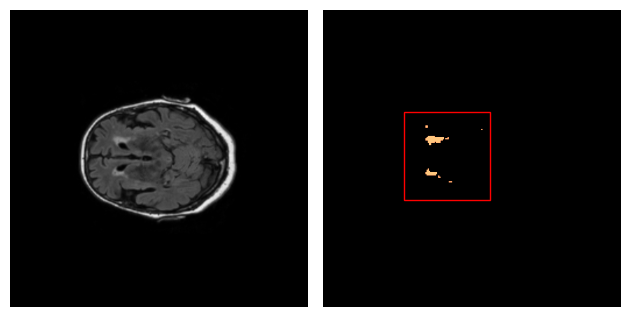

In [92]:
example = test_dataset[250]
for k,v in example.items():
    print(k,v.shape)

xmin, ymin, xmax, ymax = get_bounding_box(example['ground_truth_mask'])

fig, axs = plt.subplots(1, 2)

axs[0].imshow(example['pixel_values'][1], cmap='gray')
axs[0].axis('off')

axs[1].imshow(example['ground_truth_mask'], cmap='copper')

# create a Rectangle patch for the bounding box
rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=1, edgecolor='r', facecolor='none')

# add the patch to the second Axes
axs[1].add_patch(rect)

axs[1].axis('off')

plt.tight_layout()
plt.show()

pixel_values torch.Size([3, 1024, 1024])
original_sizes torch.Size([2])
reshaped_input_sizes torch.Size([2])
input_boxes torch.Size([7, 4])
ground_truth_mask torch.Size([256, 256])


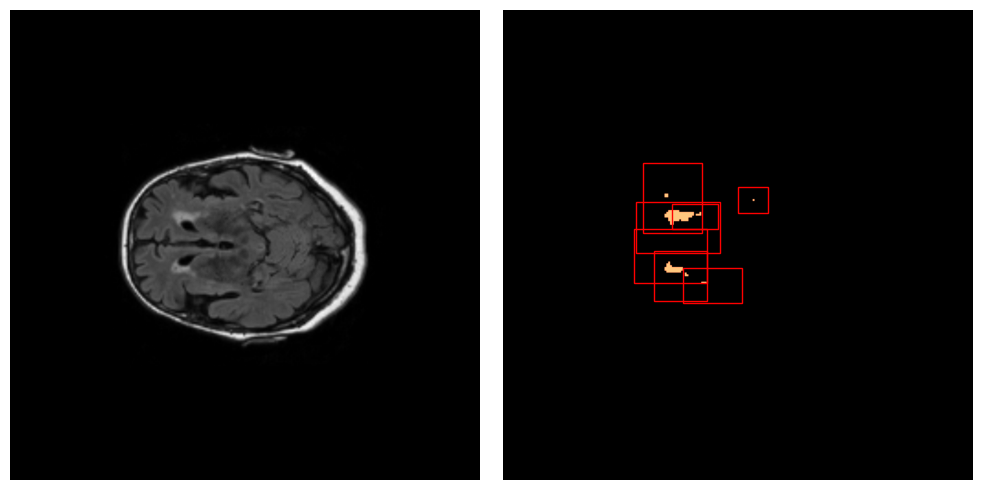

In [101]:
example = test_dataset[250]
for k,v in example.items():
    print(k,v.shape)
bounding_boxes = get_bounding_boxes(example['ground_truth_mask'])

# Crear la figura con dos subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Mostrar la imagen de entrada en el primer subplot
axs[0].imshow(example['pixel_values'][1], cmap='gray')
axs[0].axis('off')

# Mostrar la máscara de verdad terrestre en el segundo subplot
axs[1].imshow(example['ground_truth_mask'], cmap='copper')
axs[1].axis('off')

# Agregar las cajas delimitadoras al segundo subplot
for bbox in bounding_boxes:
    xmin, ymin, xmax, ymax = bbox
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
    axs[1].add_patch(rect)

plt.tight_layout()
plt.show()    

In [98]:
model = SamModel.from_pretrained("facebook/sam-vit-base")

# 1 bbox

  0%|          | 0/2587 [00:00<?, ?it/s]

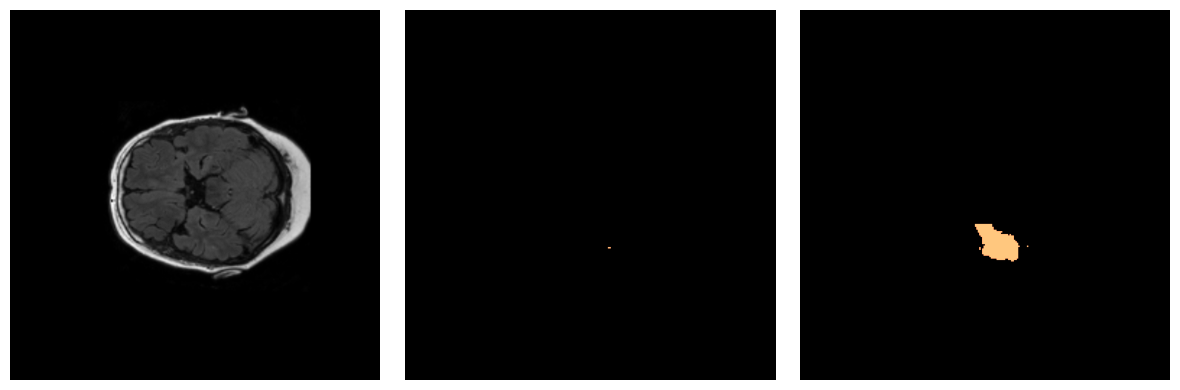

  0%|          | 1/2587 [00:23<16:39:59, 23.20s/it]

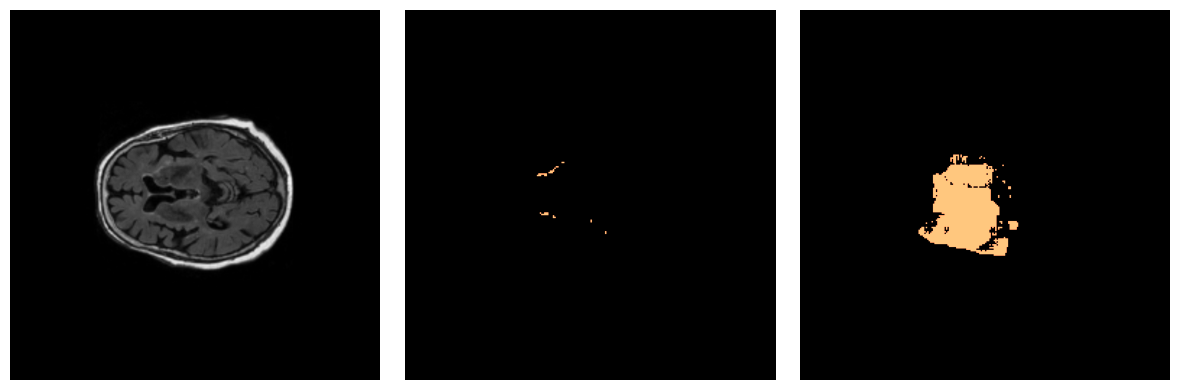

  0%|          | 2/2587 [00:46<16:38:44, 23.18s/it]

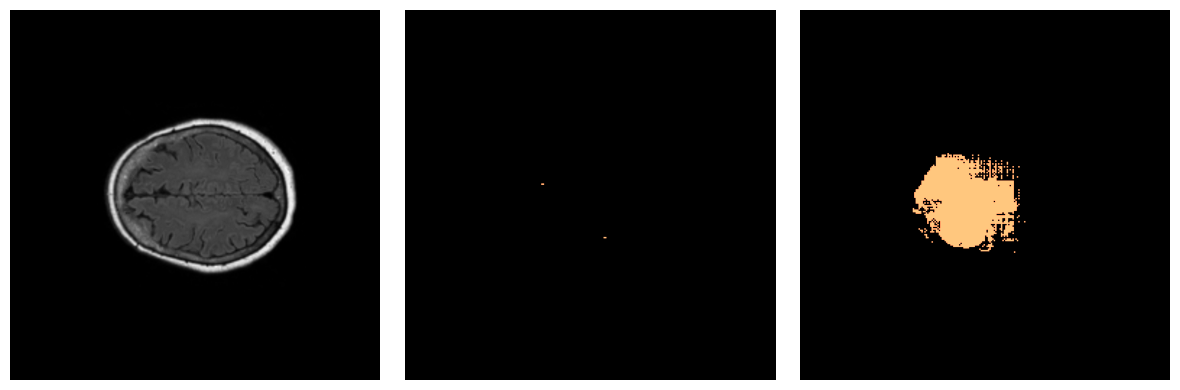

  0%|          | 3/2587 [01:09<16:27:46, 22.94s/it]

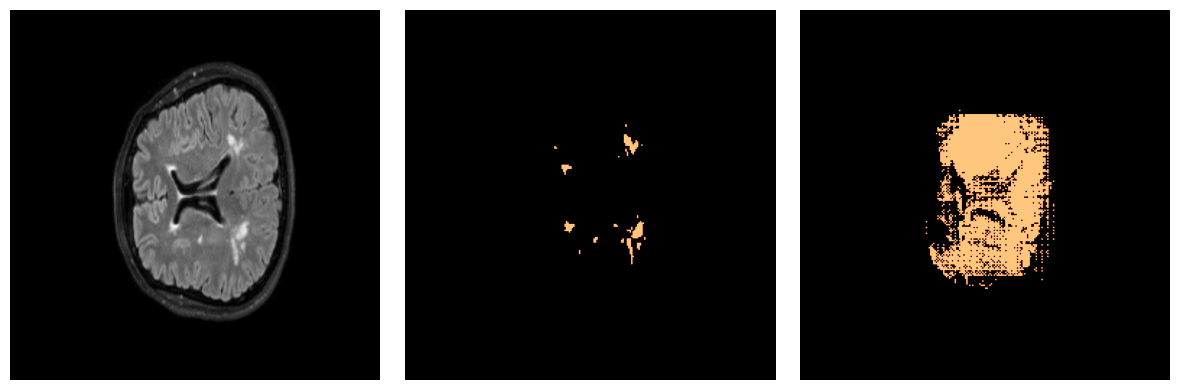

  0%|          | 4/2587 [01:30<16:10:57, 22.55s/it]

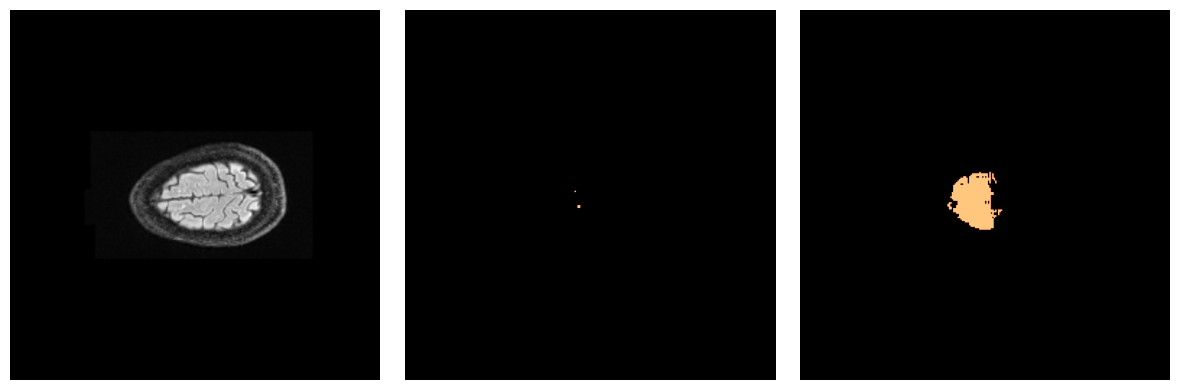

  0%|          | 5/2587 [01:53<16:07:23, 22.48s/it]

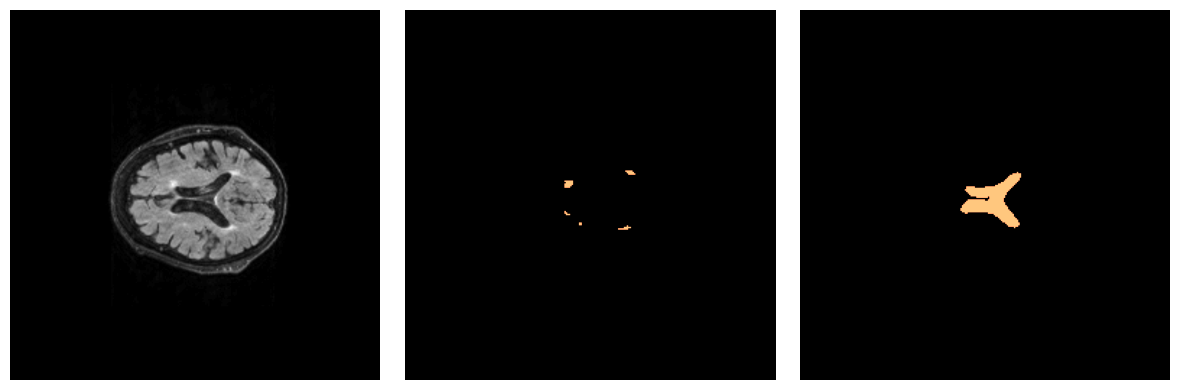

  0%|          | 6/2587 [02:16<16:12:33, 22.61s/it]

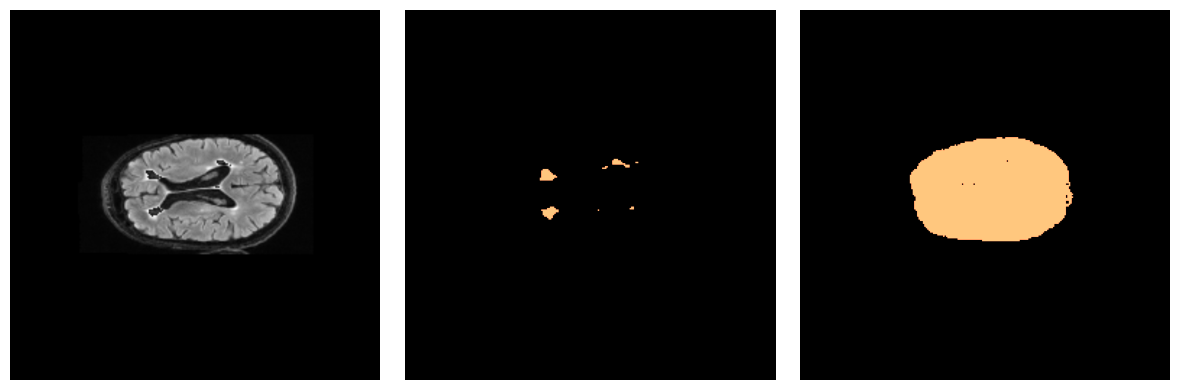

  0%|          | 7/2587 [02:38<16:11:26, 22.59s/it]

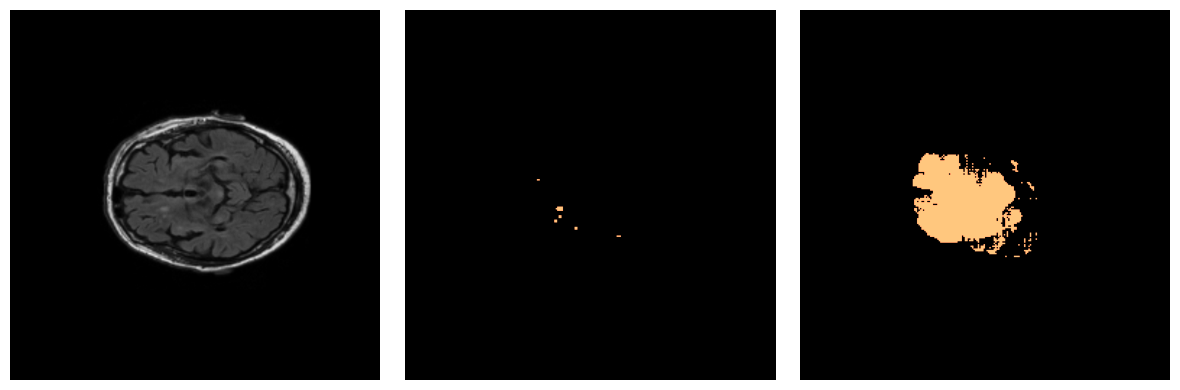

  0%|          | 8/2587 [03:01<16:08:11, 22.52s/it]

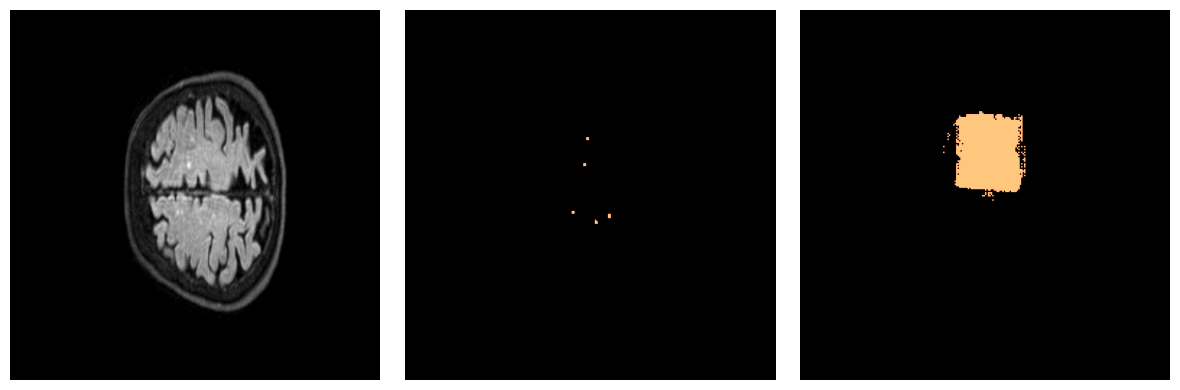

  0%|          | 9/2587 [03:27<16:53:45, 23.59s/it]

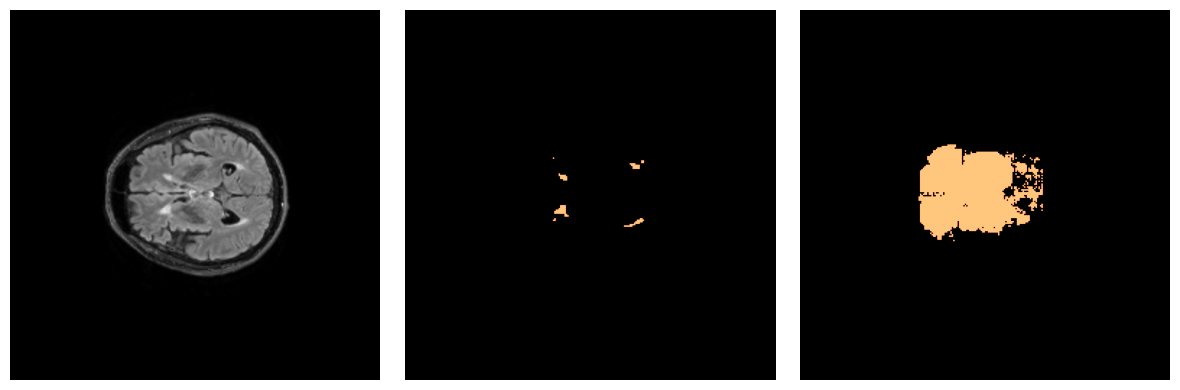

  0%|          | 10/2587 [03:53<17:26:16, 24.36s/it]

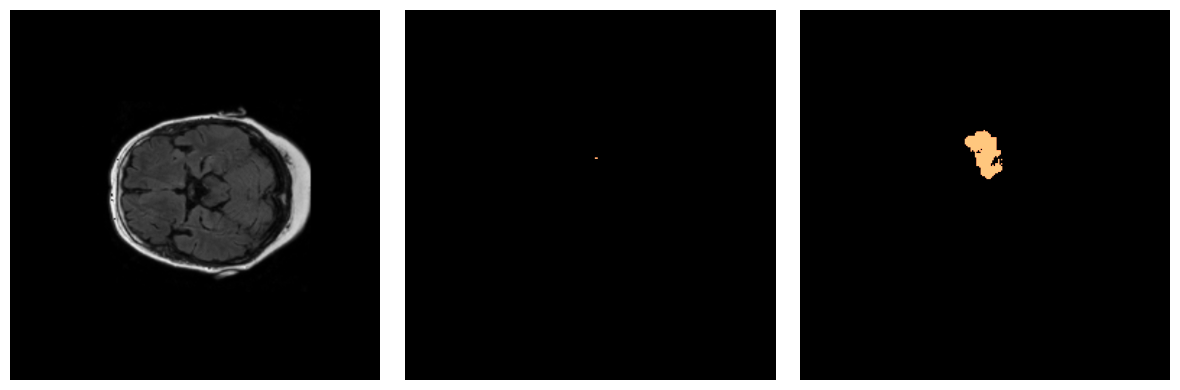

  0%|          | 11/2587 [04:15<17:05:57, 23.90s/it]

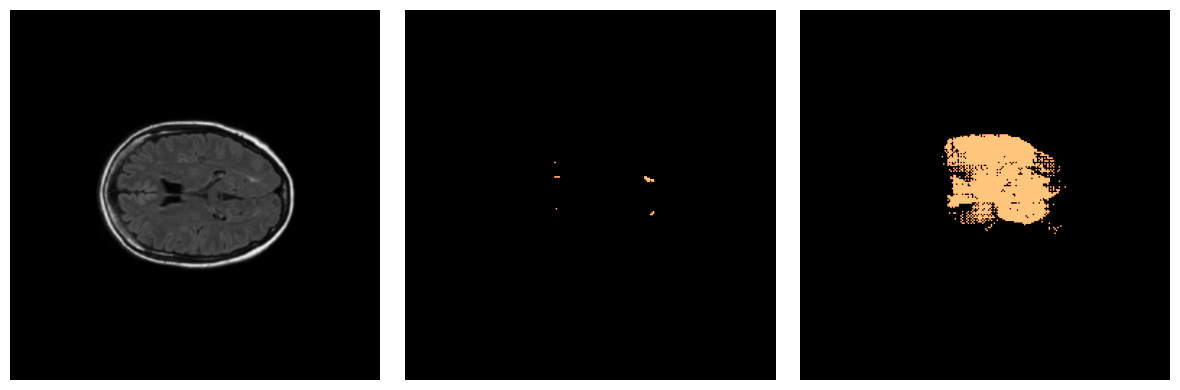

  0%|          | 12/2587 [04:37<16:38:09, 23.26s/it]

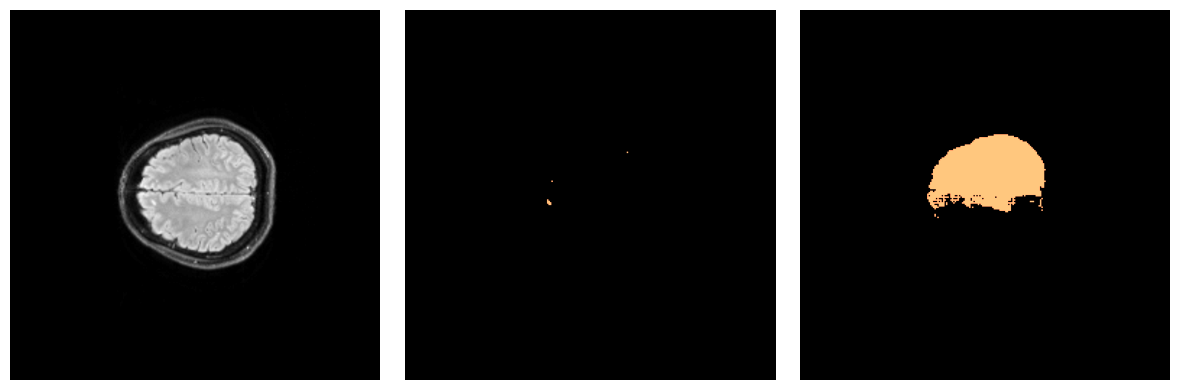

  1%|          | 13/2587 [05:00<16:32:28, 23.13s/it]

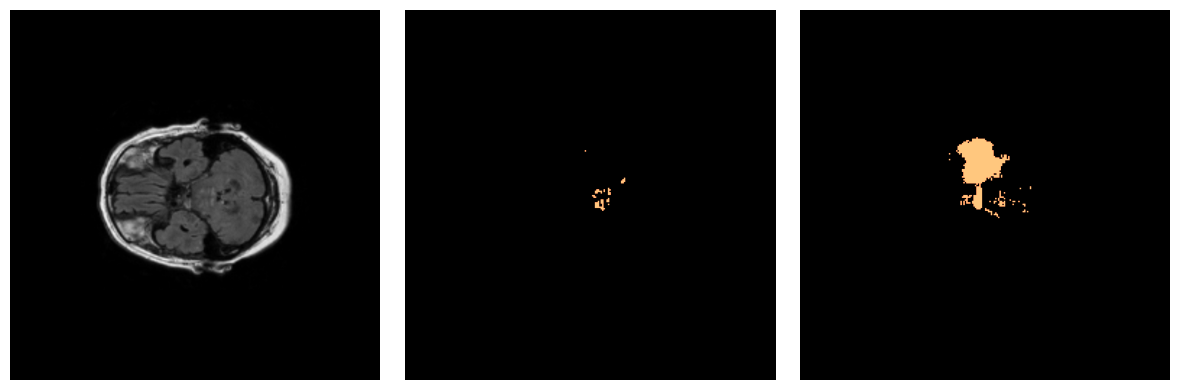

  1%|          | 14/2587 [05:24<16:47:17, 23.49s/it]

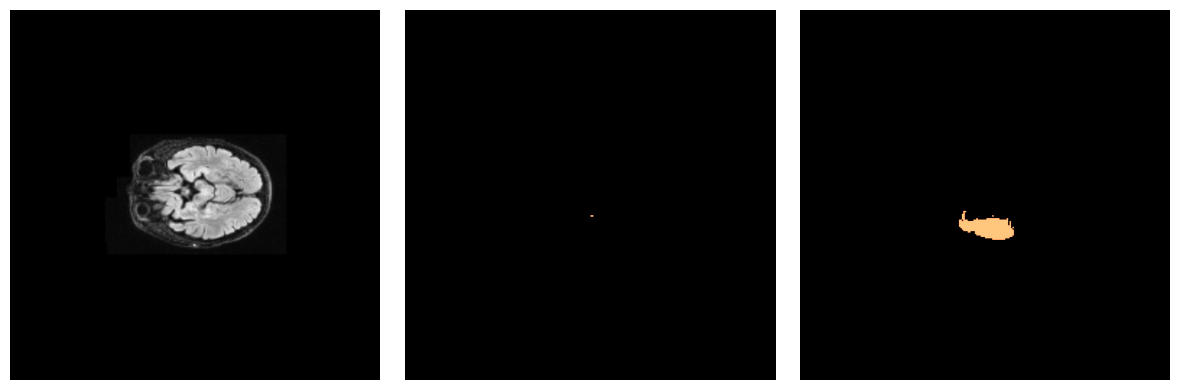

  1%|          | 15/2587 [05:47<16:33:21, 23.17s/it]

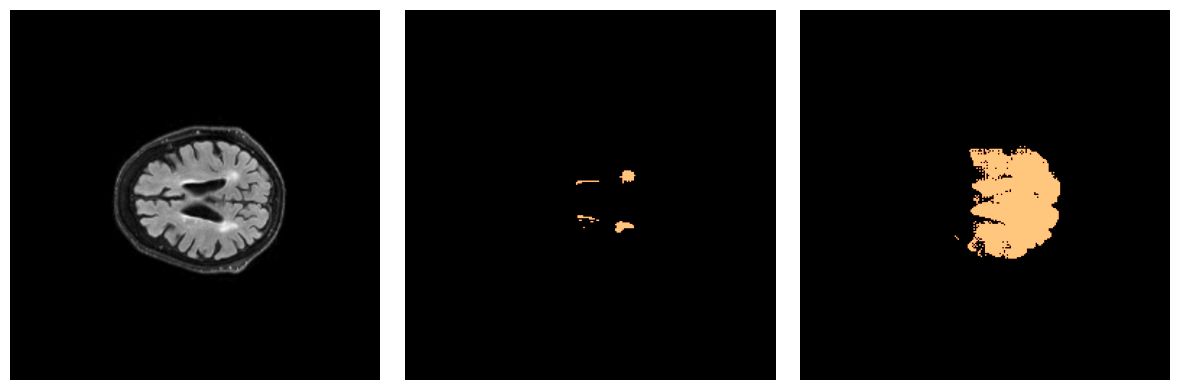

  1%|          | 16/2587 [06:09<16:25:05, 22.99s/it]

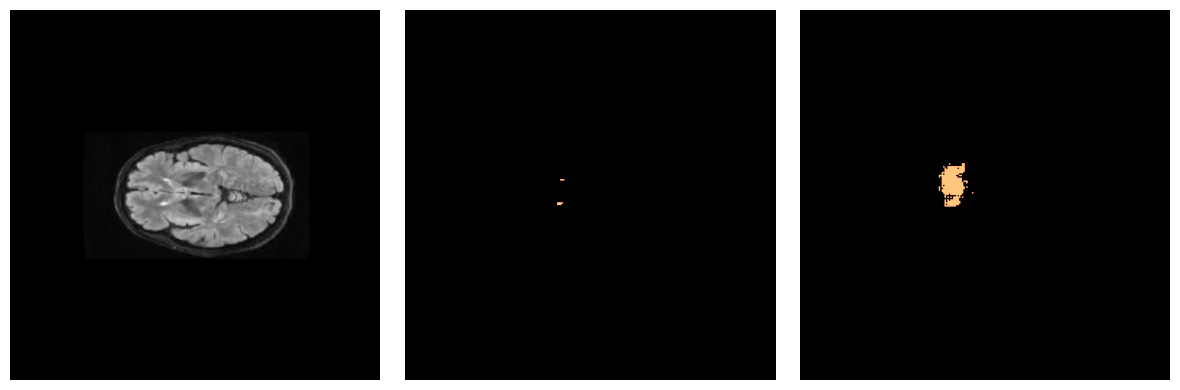

  1%|          | 17/2587 [06:32<16:14:18, 22.75s/it]

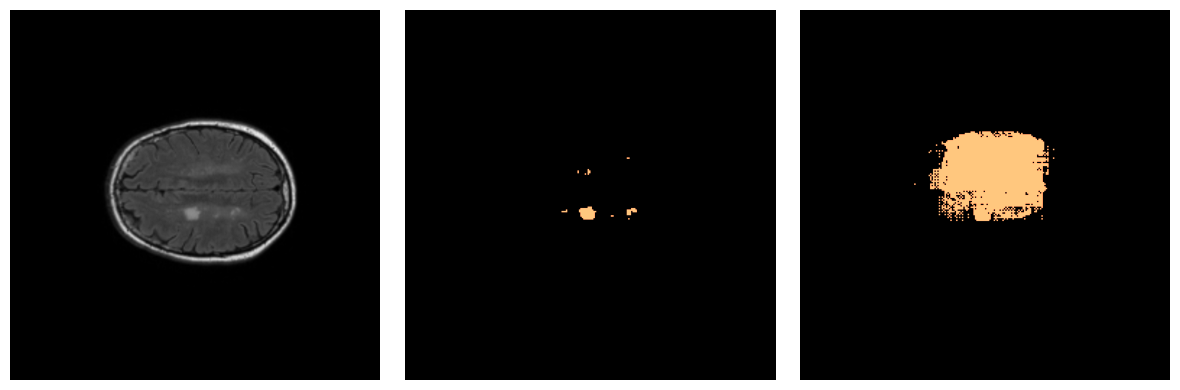

  1%|          | 18/2587 [06:54<16:04:18, 22.52s/it]

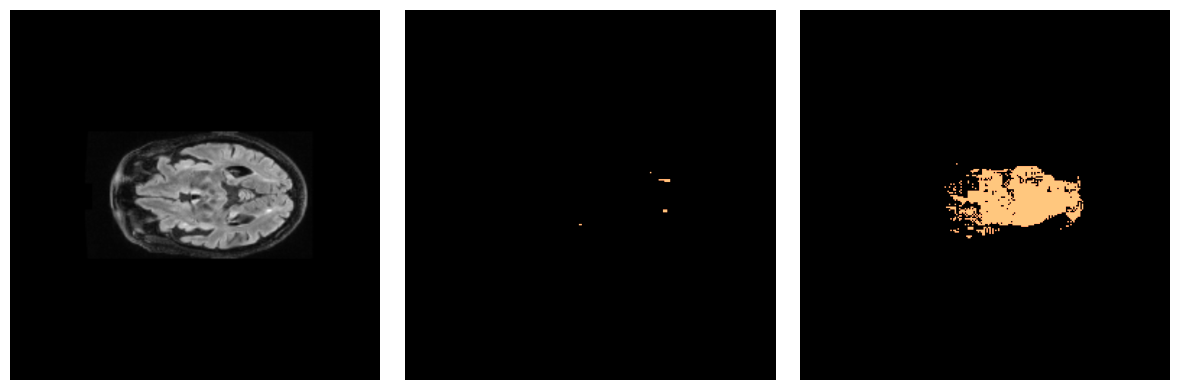

  1%|          | 19/2587 [07:16<16:05:30, 22.56s/it]

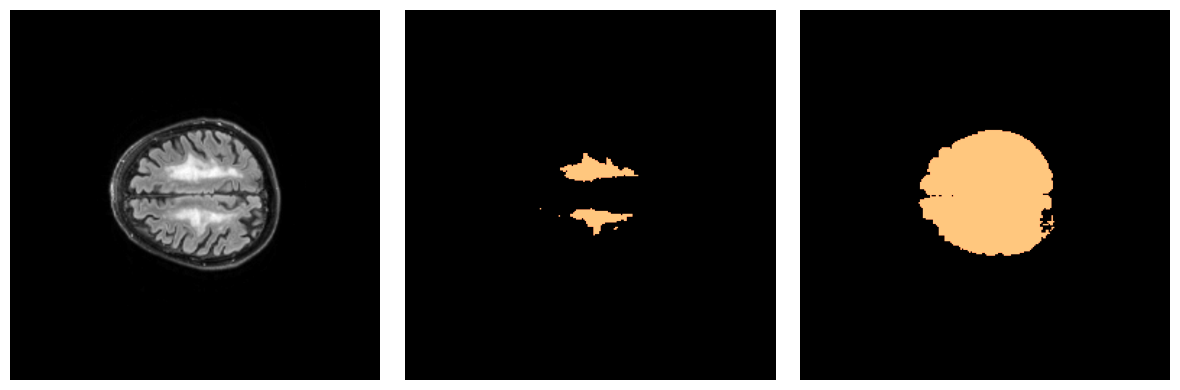

  1%|          | 20/2587 [07:39<16:07:19, 22.61s/it]

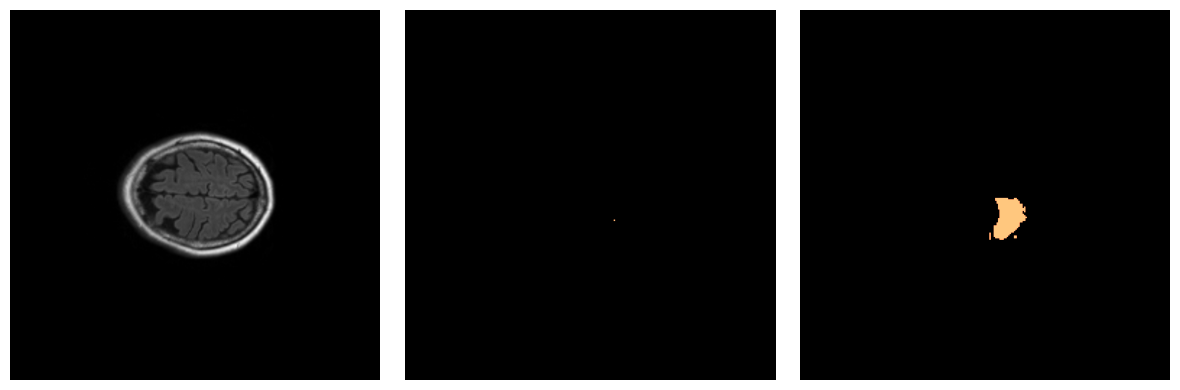

  1%|          | 21/2587 [08:01<15:56:38, 22.37s/it]

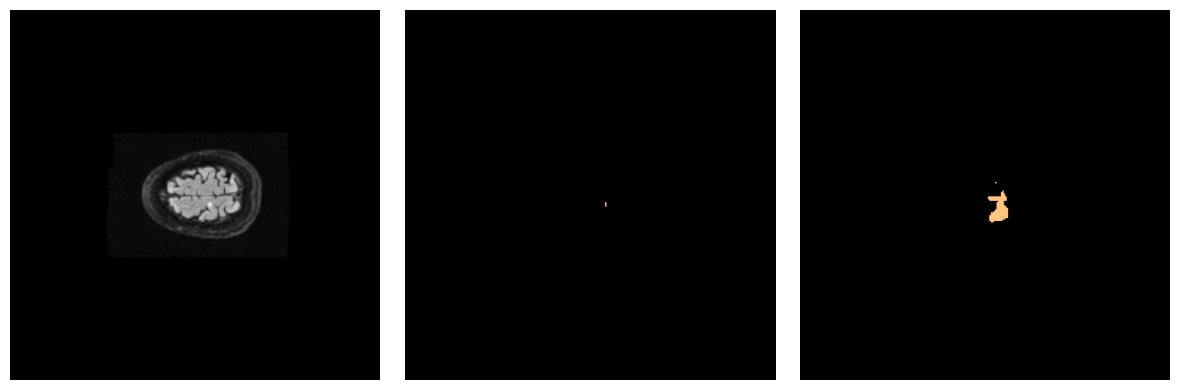

  1%|          | 22/2587 [08:23<15:56:51, 22.38s/it]

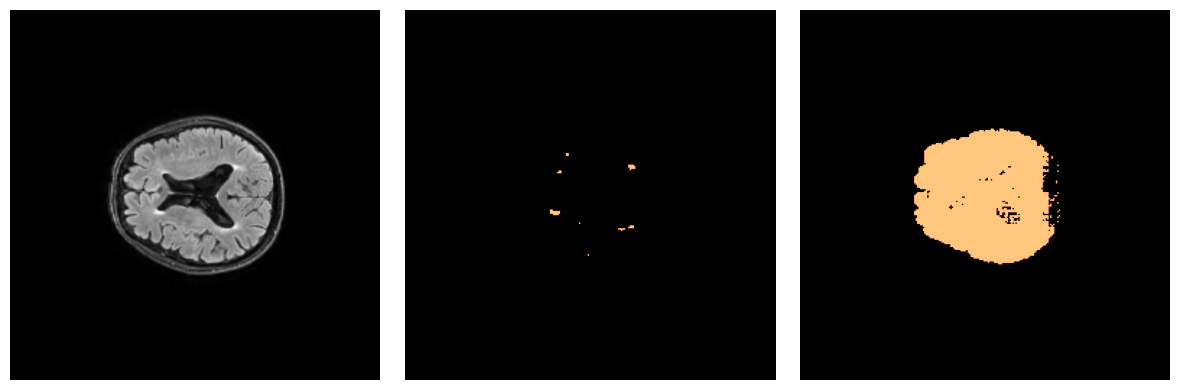

  1%|          | 23/2587 [08:46<16:06:38, 22.62s/it]

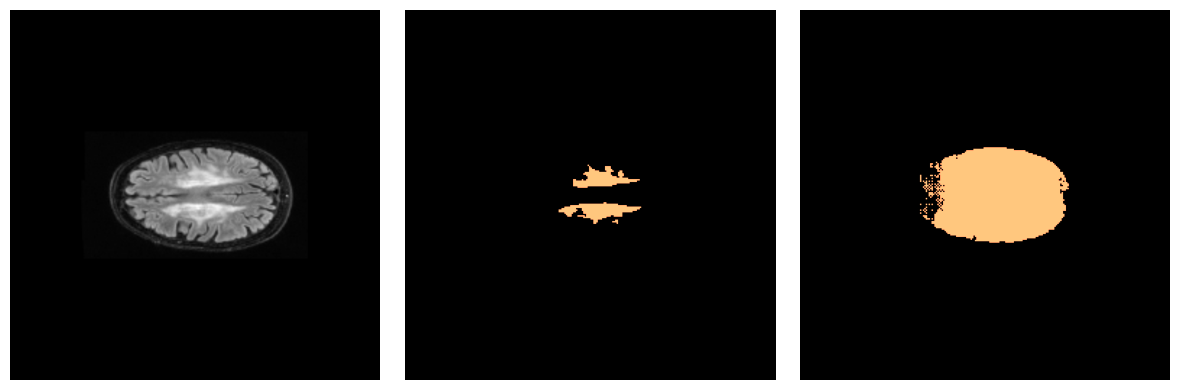

  1%|          | 24/2587 [09:09<16:06:10, 22.62s/it]

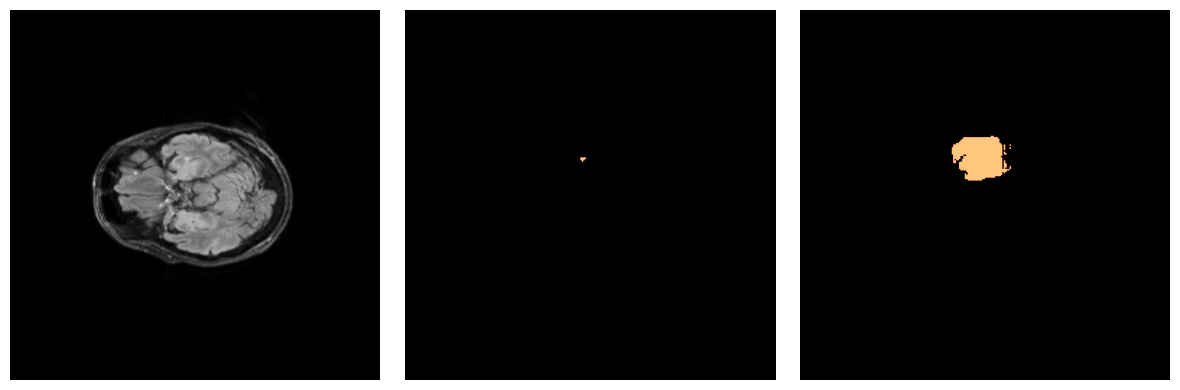

  1%|          | 25/2587 [09:31<15:54:31, 22.35s/it]

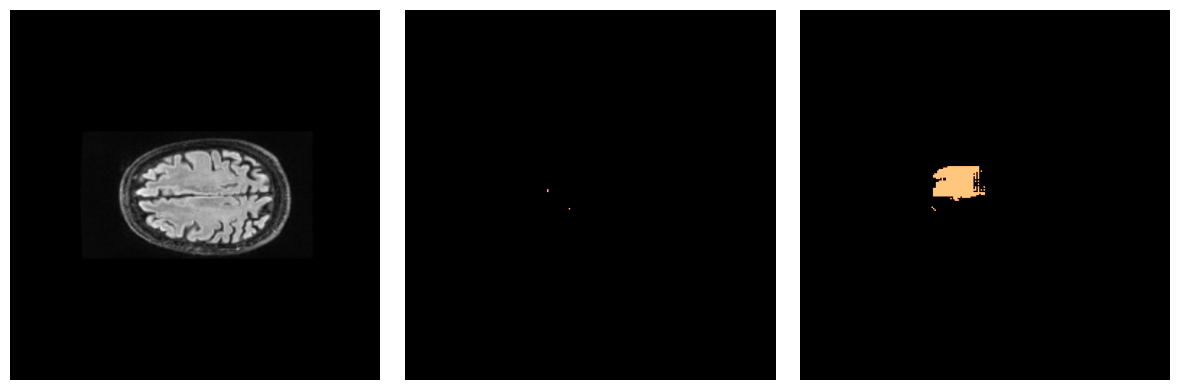

  1%|          | 26/2587 [09:53<15:55:44, 22.39s/it]

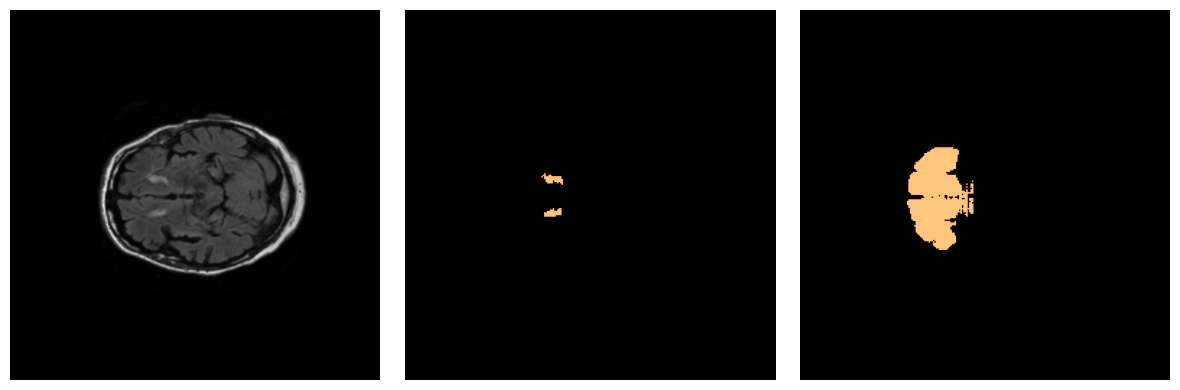

  1%|          | 27/2587 [10:16<15:54:22, 22.37s/it]

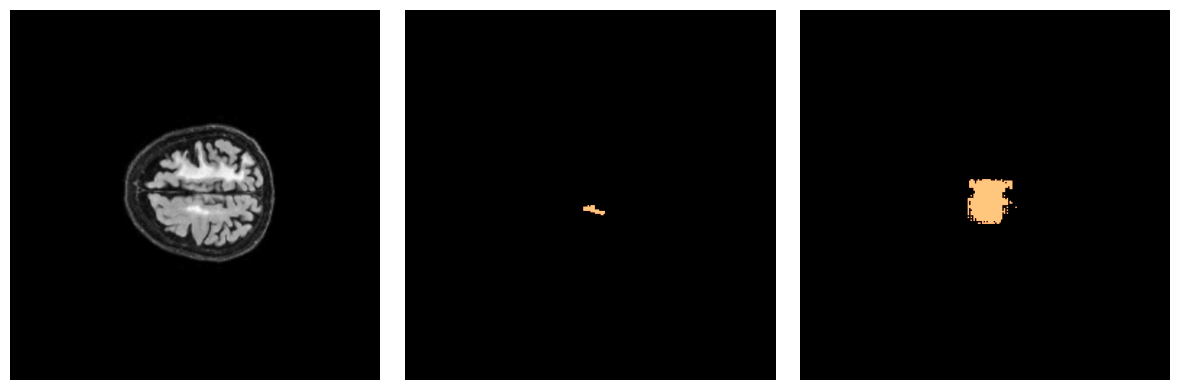

  1%|          | 28/2587 [10:37<15:45:55, 22.18s/it]

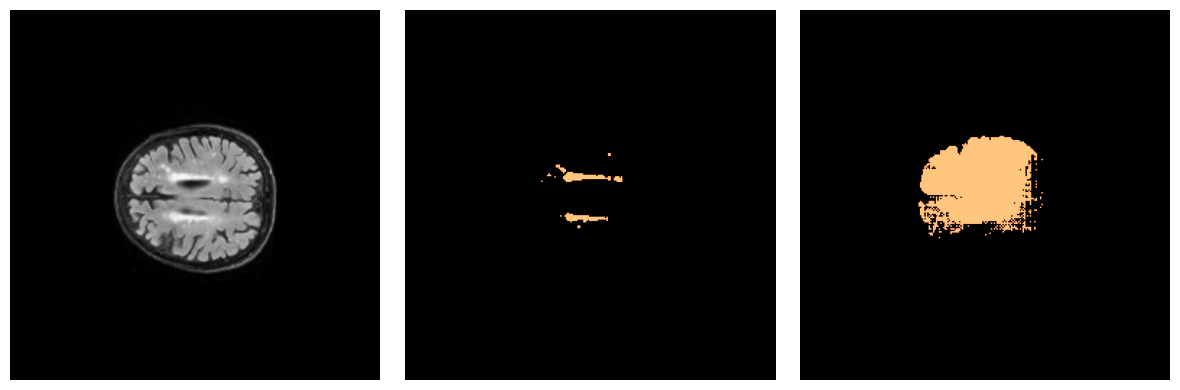

  1%|          | 29/2587 [10:59<15:46:01, 22.19s/it]

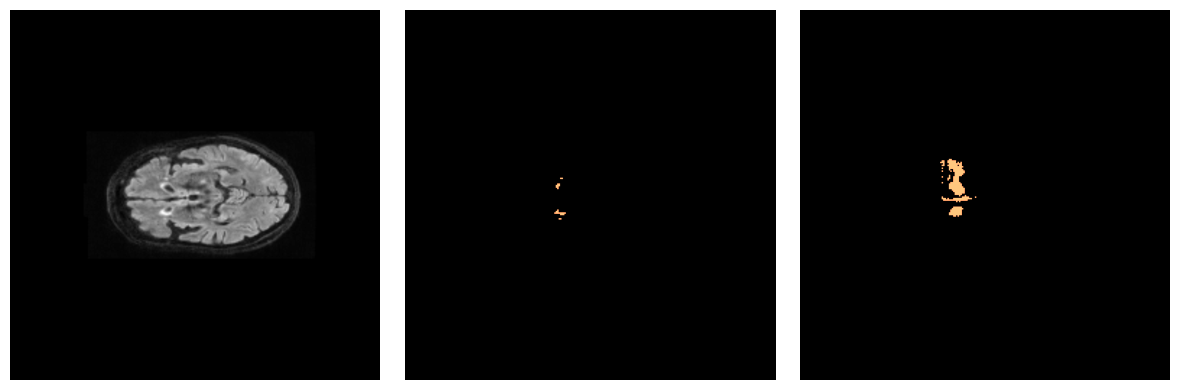

  1%|          | 30/2587 [11:22<15:52:05, 22.34s/it]

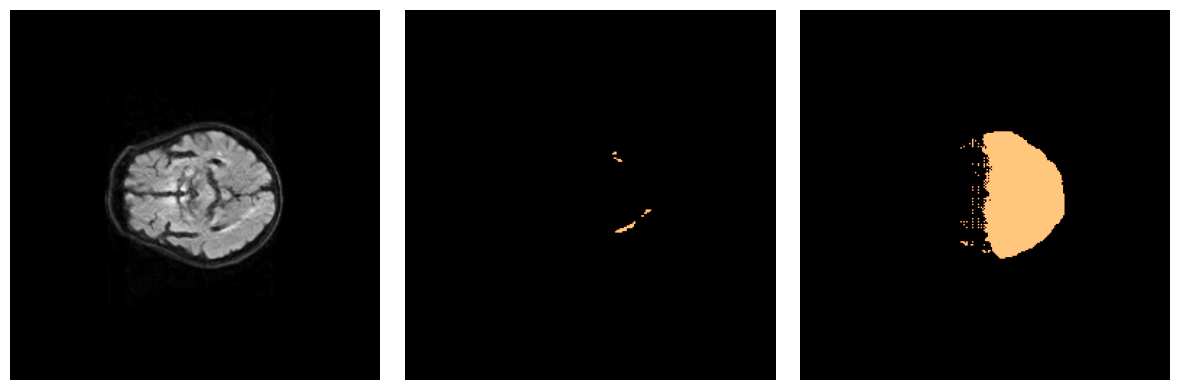

  1%|          | 31/2587 [11:45<15:53:13, 22.38s/it]

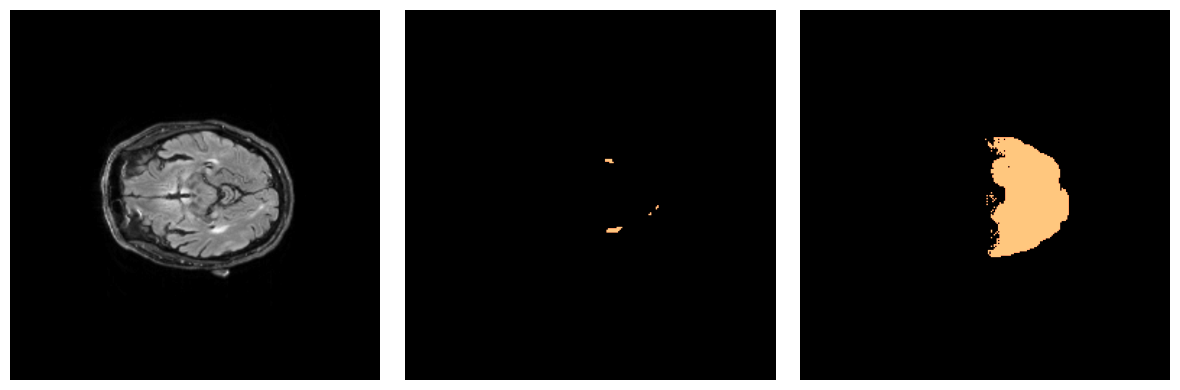

  1%|          | 32/2587 [12:06<15:42:49, 22.14s/it]

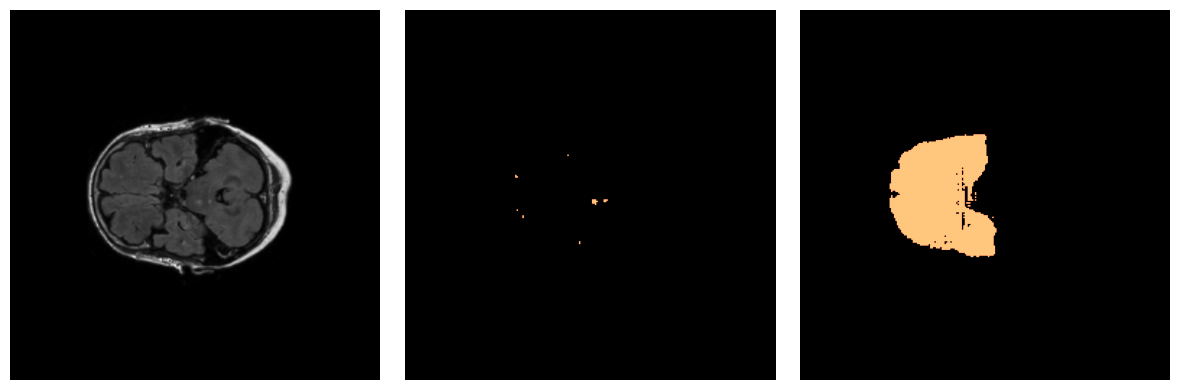

  1%|▏         | 33/2587 [12:28<15:36:21, 22.00s/it]

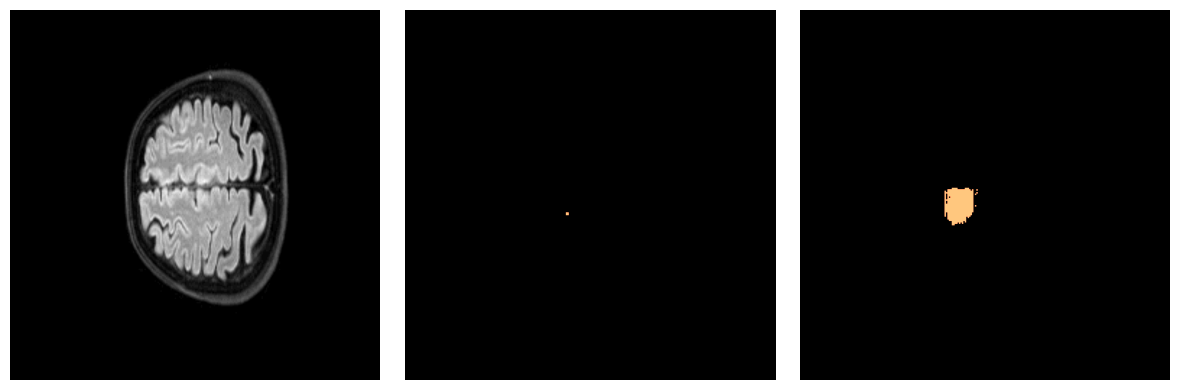

  1%|▏         | 34/2587 [12:49<15:28:09, 21.81s/it]

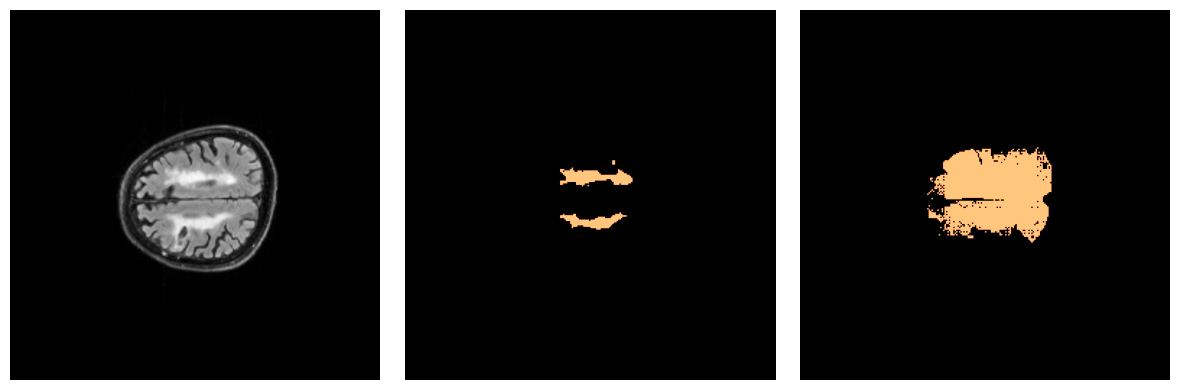

  1%|▏         | 35/2587 [13:09<15:05:57, 21.30s/it]

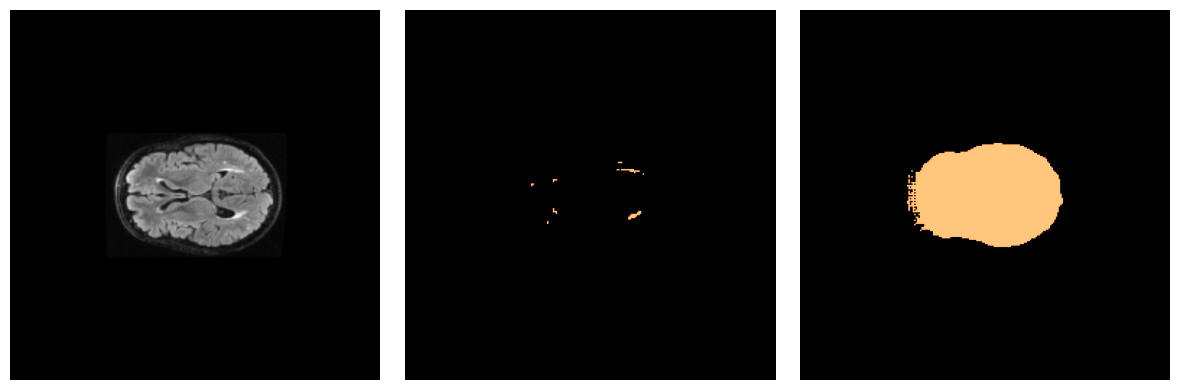

  1%|▏         | 36/2587 [13:29<14:49:51, 20.93s/it]

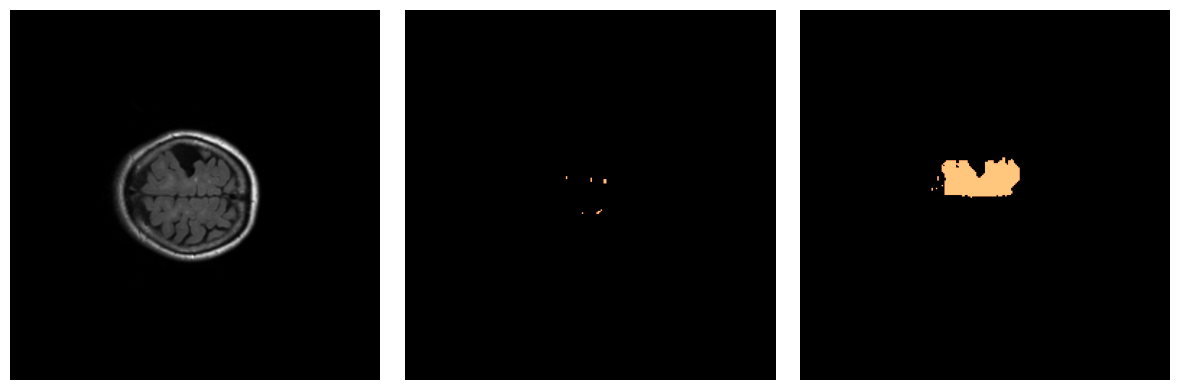

  1%|▏         | 37/2587 [13:51<14:57:39, 21.12s/it]

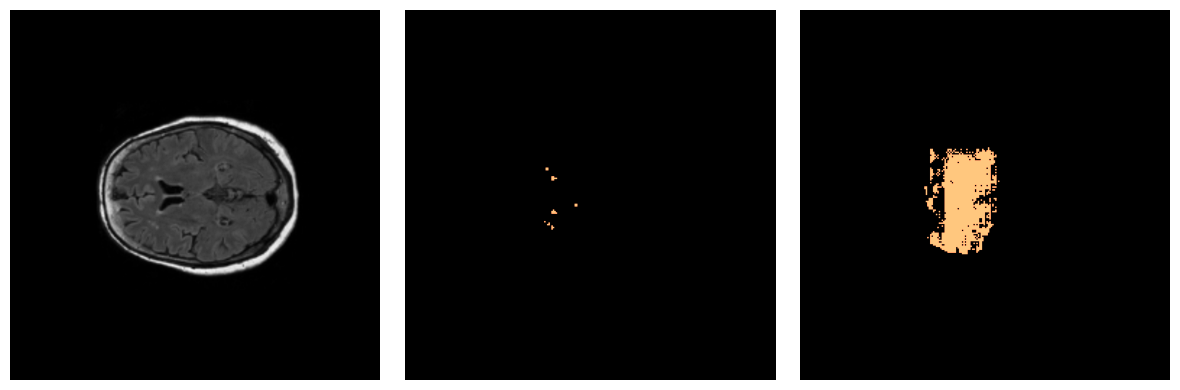

  1%|▏         | 38/2587 [14:14<15:15:21, 21.55s/it]

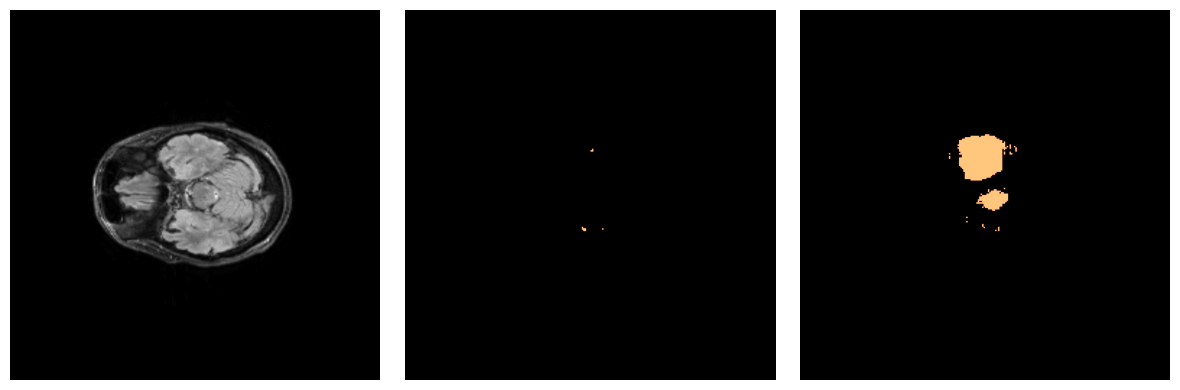

  2%|▏         | 39/2587 [14:36<15:24:01, 21.76s/it]

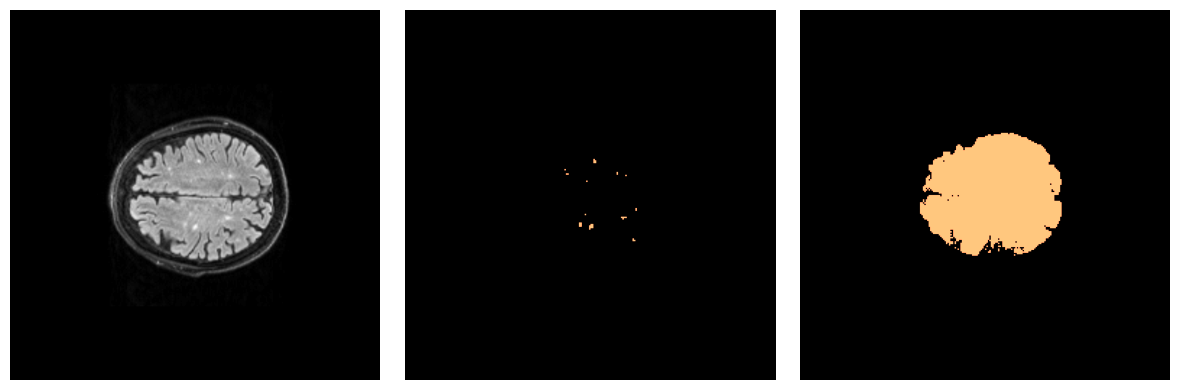

  2%|▏         | 40/2587 [14:58<15:26:29, 21.83s/it]

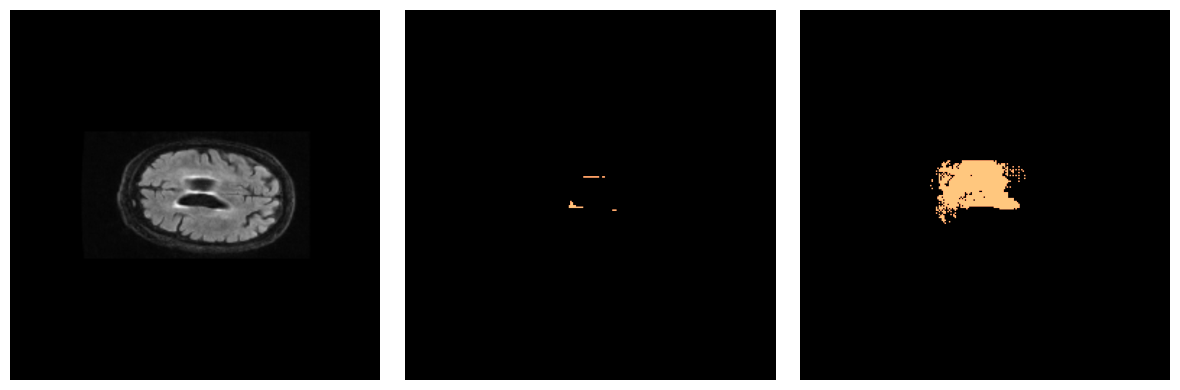

  2%|▏         | 41/2587 [15:20<15:35:05, 22.04s/it]

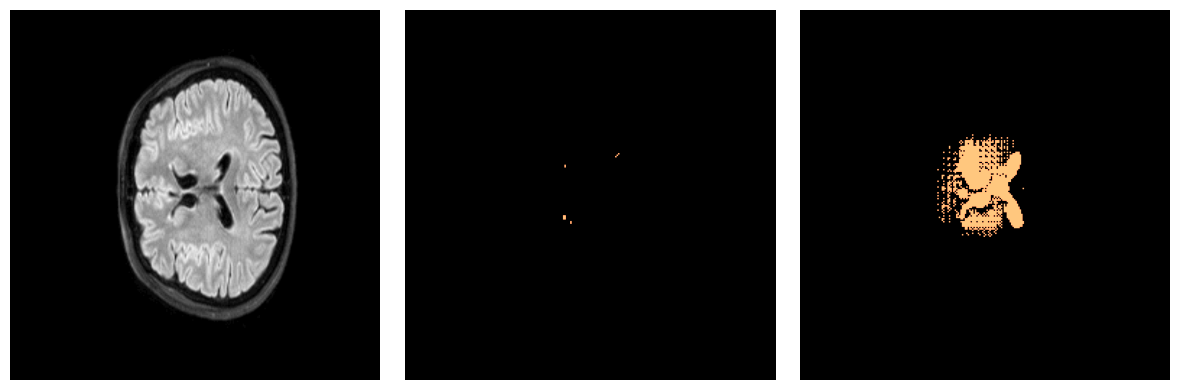

  2%|▏         | 42/2587 [15:43<15:43:48, 22.25s/it]

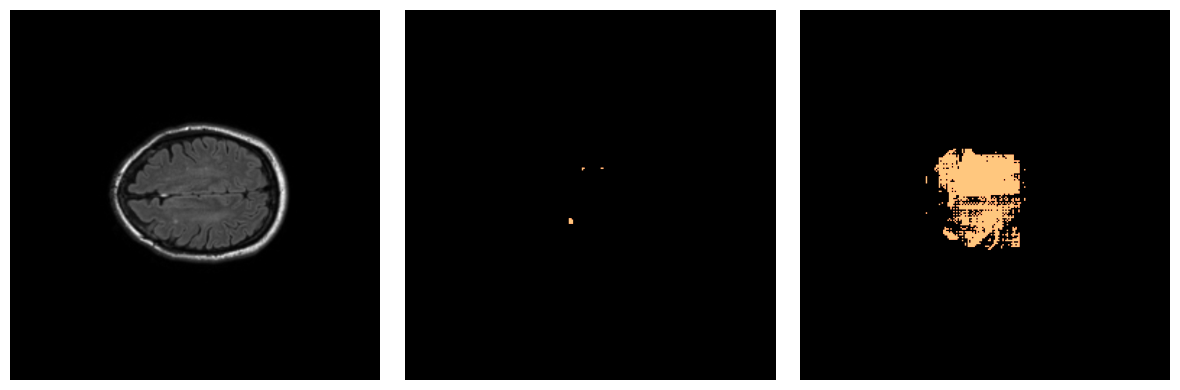

  2%|▏         | 43/2587 [16:05<15:43:27, 22.25s/it]

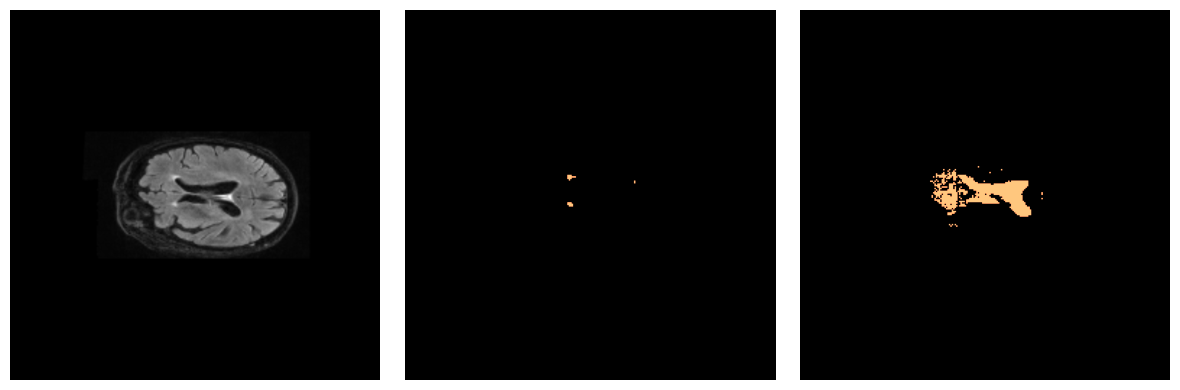

  2%|▏         | 44/2587 [16:27<15:37:45, 22.13s/it]

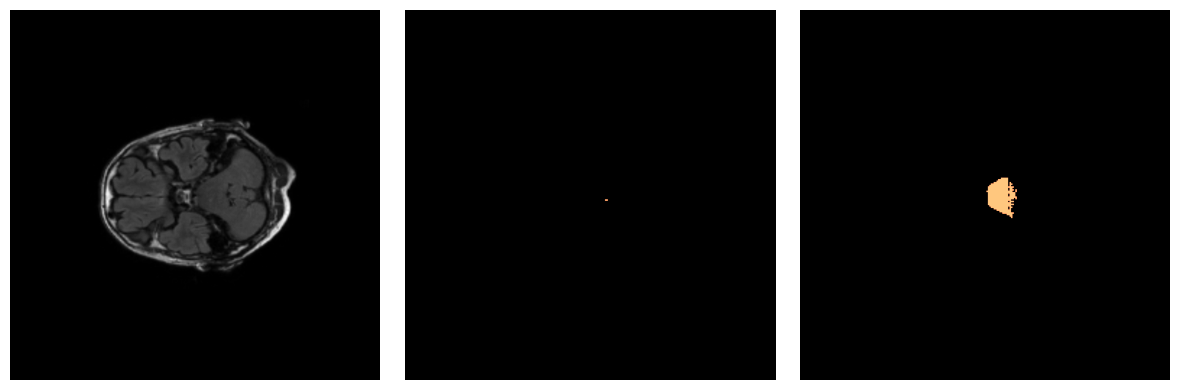

  2%|▏         | 45/2587 [16:54<15:55:33, 22.55s/it]


KeyboardInterrupt: 

In [79]:
with torch.no_grad():
    for batch in tqdm(test_dataloader):

        # forward pass
        # outputs = model(pixel_values=batch["pixel_values"].cuda(),
        #               input_boxes=batch["input_boxes"].cuda(),
        #               multimask_output=False)

        # # compute loss
        # predicted_masks = outputs.pred_masks.squeeze(1)
        # ground_truth_masks = batch["ground_truth_mask"].float().cuda()
        # loss = seg_loss(predicted_masks, ground_truth_masks.unsqueeze(1))

        outputs = model(pixel_values=batch["pixel_values"],
                      input_boxes=batch["input_boxes"],
                      multimask_output=False)

        # compute loss
        predicted_masks = outputs.pred_masks.squeeze(1)
        ground_truth_masks = batch["ground_truth_mask"].float()
       # loss = seg_loss(predicted_masks, ground_truth_masks.unsqueeze(1))

        # apply sigmoid
        medsam_seg_prob = torch.sigmoid(outputs.pred_masks.squeeze(1))
        # convert soft mask to hard mask
        medsam_seg_prob = medsam_seg_prob.cpu().numpy().squeeze()
        medsam_seg = (medsam_seg_prob > 0.5).astype(np.uint8)
        
        plt.figure(figsize=(12,4))
        plt.subplot(1,3,1)
        plt.imshow(batch["pixel_values"][0,1], cmap='gray')
        plt.axis('off')
        plt.subplot(1,3,2)
        plt.imshow(batch["ground_truth_mask"][0], cmap='copper')
        plt.axis('off')
        plt.subplot(1,3,3)
        plt.imshow(medsam_seg, cmap='copper')
        plt.axis('off')
        plt.tight_layout()
        plt.show()


# MAS DE UNA 

  0%|          | 0/2587 [00:00<?, ?it/s]

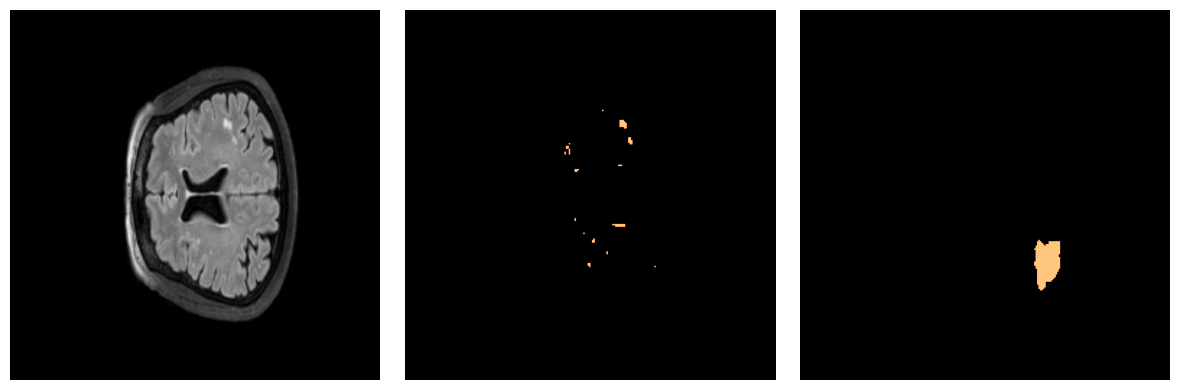

  0%|          | 1/2587 [00:25<18:01:50, 25.10s/it]

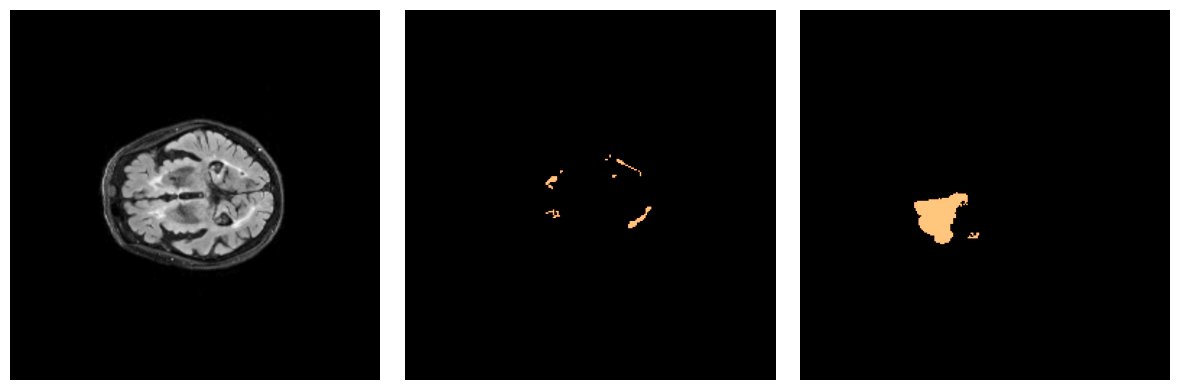

  0%|          | 2/2587 [00:49<17:39:33, 24.59s/it]

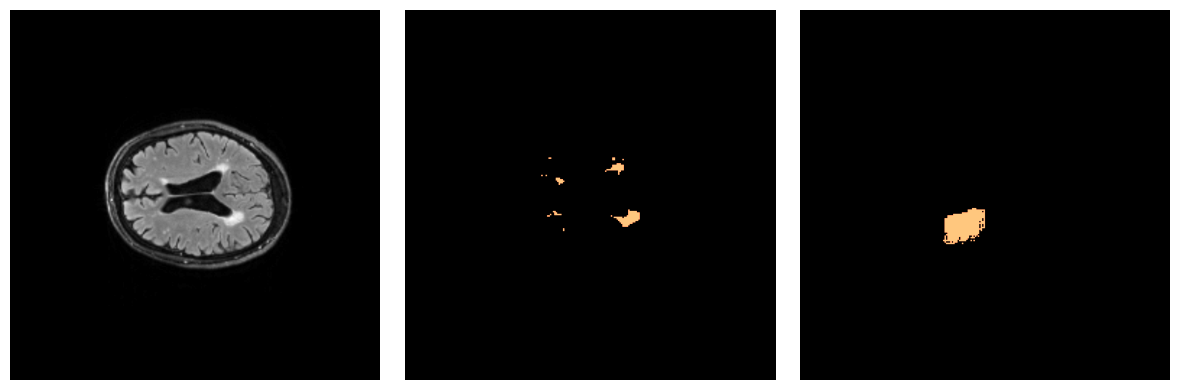

  0%|          | 3/2587 [01:12<17:09:42, 23.91s/it]

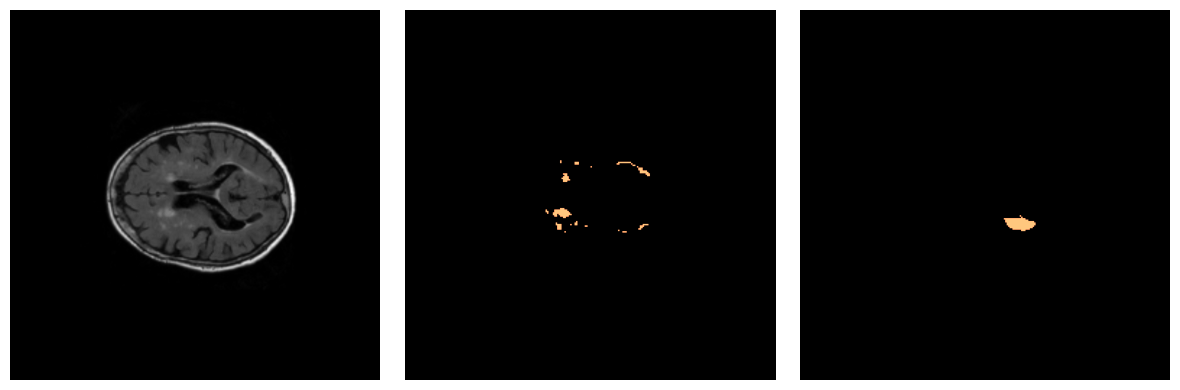

  0%|          | 4/2587 [01:37<17:21:33, 24.19s/it]

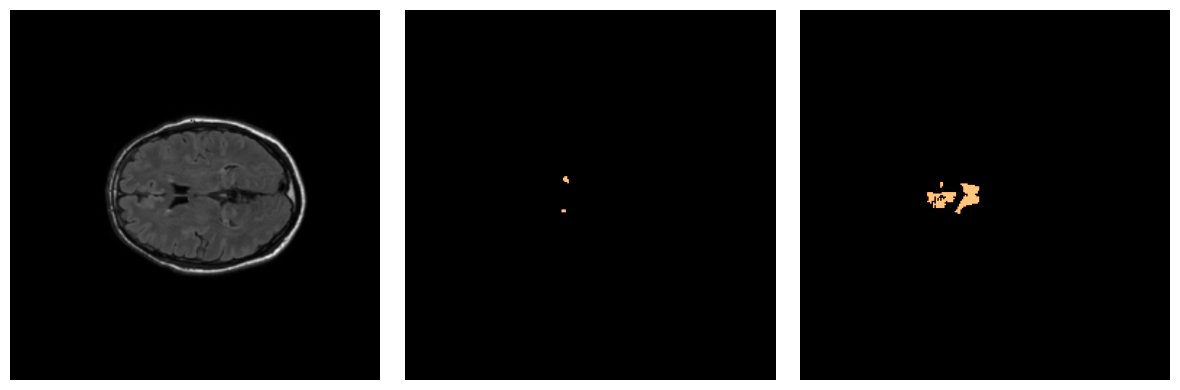

  0%|          | 5/2587 [01:59<16:49:43, 23.46s/it]

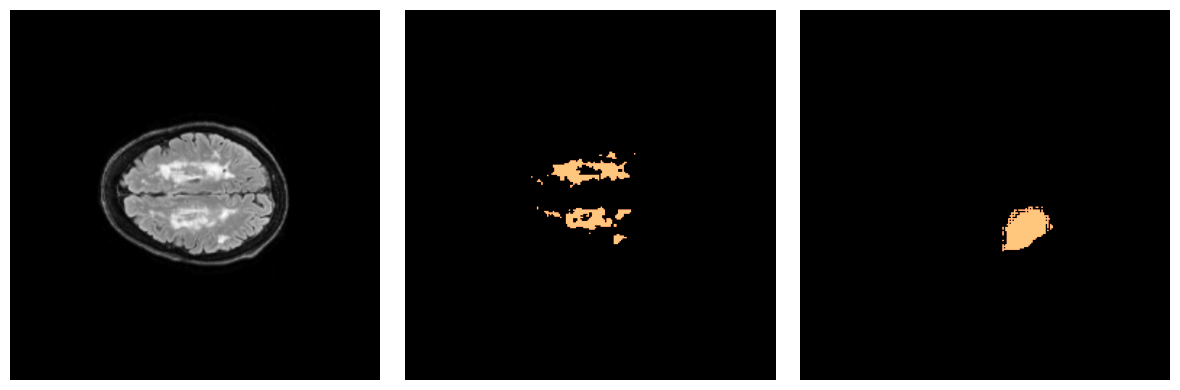

  0%|          | 6/2587 [02:44<19:39:56, 27.43s/it]


TypeError: Invalid shape (256,) for image data

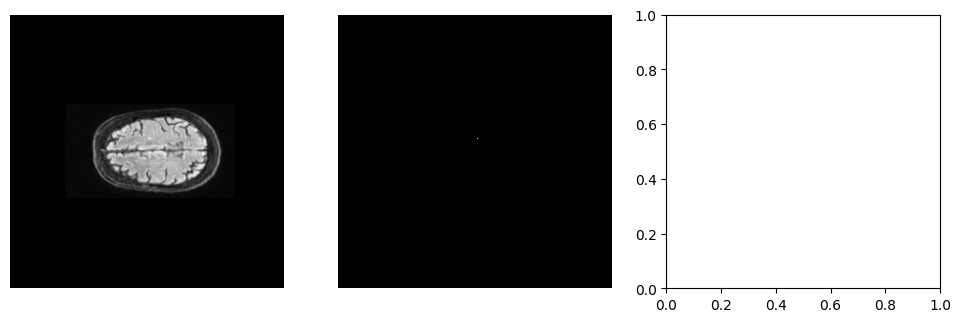

In [102]:
with torch.no_grad():
    for batch in tqdm(test_dataloader):

        # forward pass
        # outputs = model(pixel_values=batch["pixel_values"].cuda(),
        #               input_boxes=batch["input_boxes"].cuda(),
        #               multimask_output=False)

        # # compute loss
        # predicted_masks = outputs.pred_masks.squeeze(1)
        # ground_truth_masks = batch["ground_truth_mask"].float().cuda()
        # loss = seg_loss(predicted_masks, ground_truth_masks.unsqueeze(1))

        outputs = model(pixel_values=batch["pixel_values"],
                      input_boxes=batch["input_boxes"],
                      multimask_output=False)

        # compute loss
        predicted_masks = outputs.pred_masks.squeeze(1)
        ground_truth_masks = batch["ground_truth_mask"].float()
       # loss = seg_loss(predicted_masks, ground_truth_masks.unsqueeze(1))

        # apply sigmoid
        medsam_seg_prob = torch.sigmoid(outputs.pred_masks.squeeze(1))
        # convert soft mask to hard mask
        medsam_seg_prob = medsam_seg_prob.cpu().numpy().squeeze()
        #medsam_seg = (medsam_seg_prob > 0.5).astype(np.uint8)
        medsam_seg = (medsam_seg_prob[0] > 0.5).astype(np.uint8)
        plt.figure(figsize=(12,4))
        plt.subplot(1,3,1)
        plt.imshow(batch["pixel_values"][0,1], cmap='gray')
        plt.axis('off')
        plt.subplot(1,3,2)
        plt.imshow(batch["ground_truth_mask"][0], cmap='copper')
        plt.axis('off')
        plt.subplot(1,3,3)
        plt.imshow(medsam_seg, cmap='copper')
        plt.axis('off')
        plt.tight_layout()
        plt.show()


# MEDSAM

In [117]:
device = "cuda" if torch.cuda.is_available() else "cpu"
processor = SamProcessor.from_pretrained("wanglab/medsam-vit-base")
model = SamModel.from_pretrained("wanglab/medsam-vit-base").to(device)

  0%|          | 0/2587 [00:00<?, ?it/s]

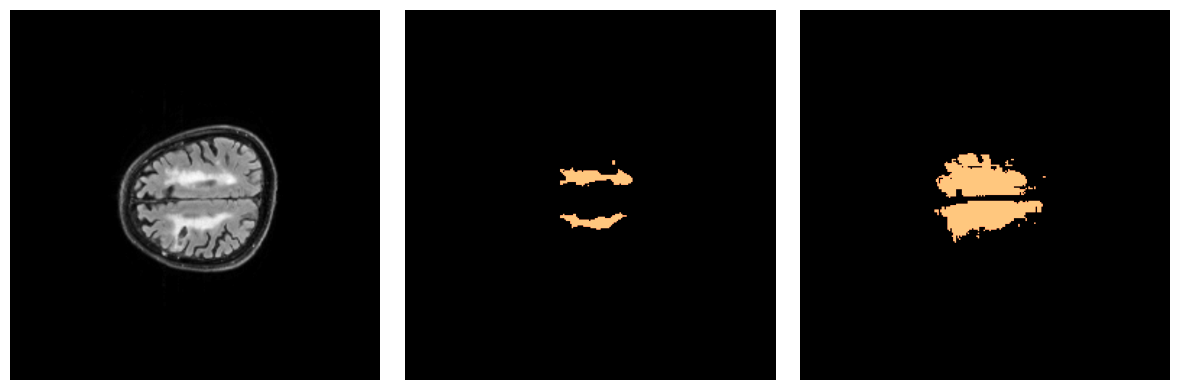

  0%|          | 1/2587 [00:07<5:02:51,  7.03s/it]

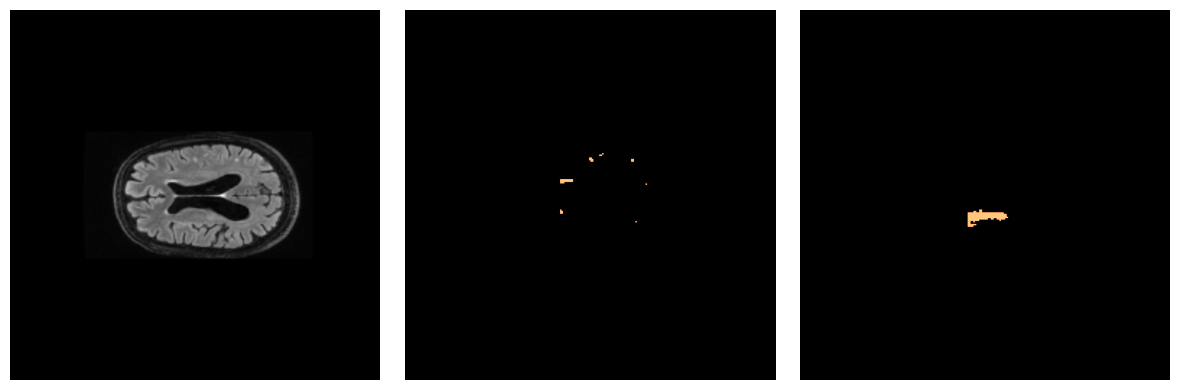

  0%|          | 2/2587 [00:08<2:29:43,  3.48s/it]

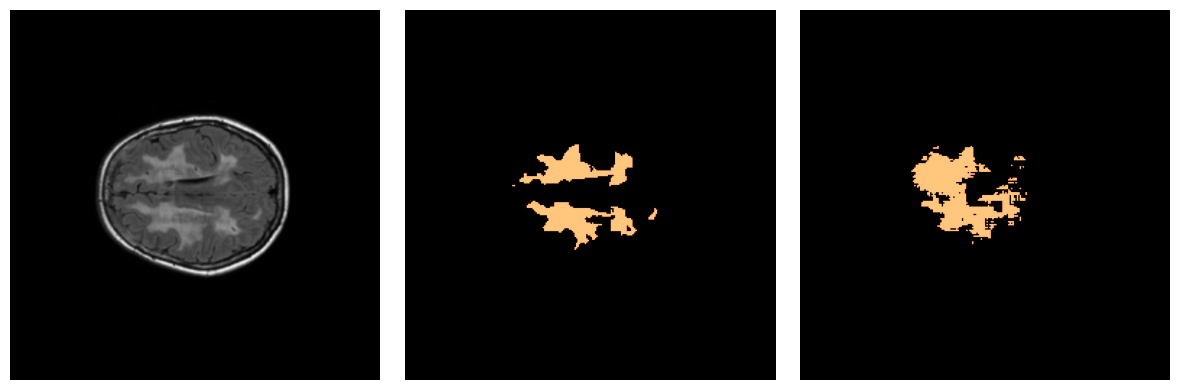

  0%|          | 3/2587 [00:08<1:38:33,  2.29s/it]

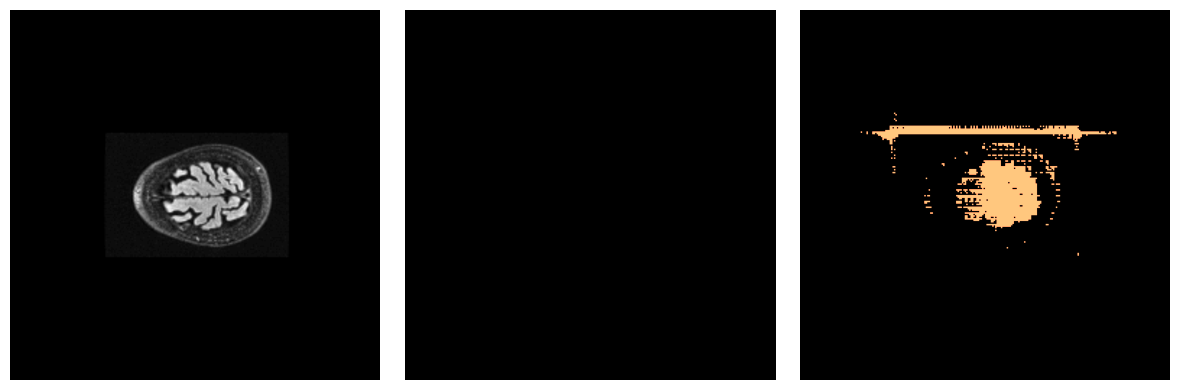

  0%|          | 4/2587 [00:09<1:13:55,  1.72s/it]

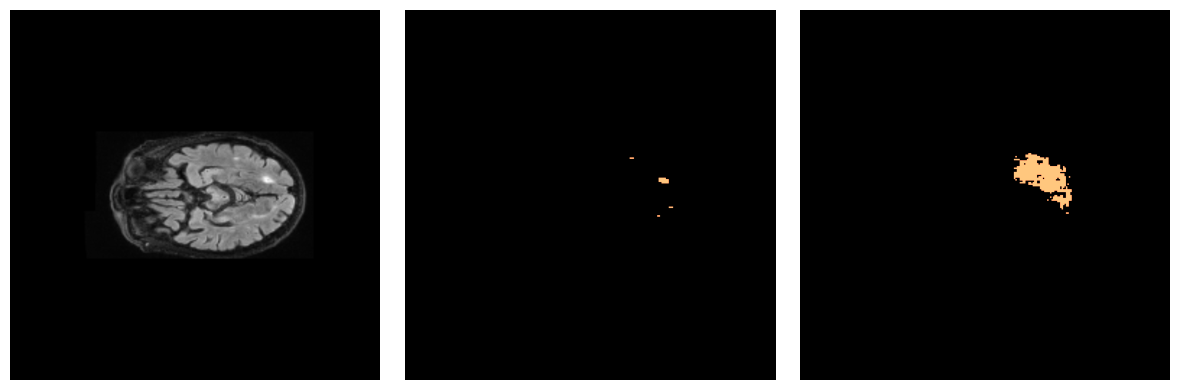

  0%|          | 5/2587 [00:10<1:00:50,  1.41s/it]

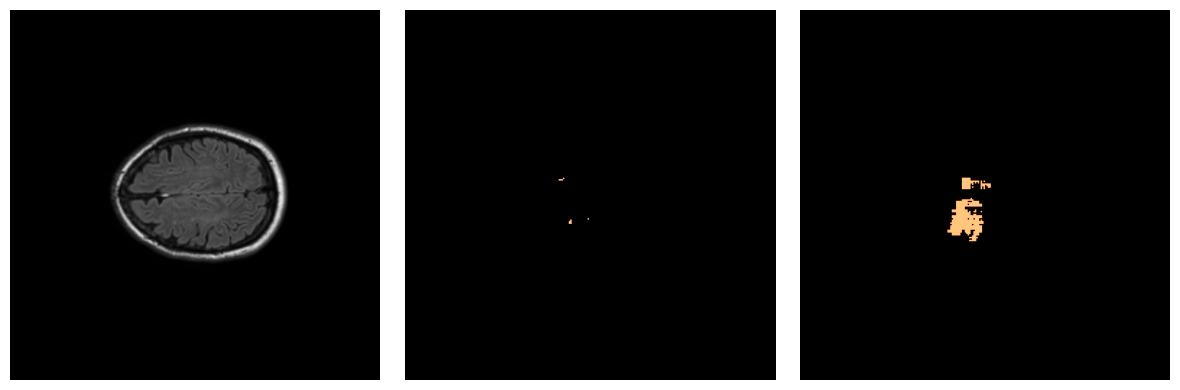

  0%|          | 6/2587 [00:11<52:45,  1.23s/it]  

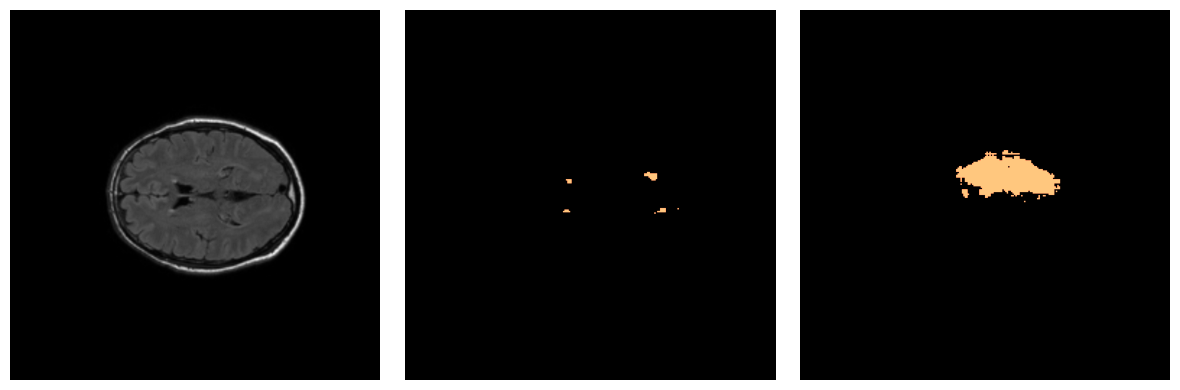

  0%|          | 7/2587 [00:12<47:56,  1.11s/it]

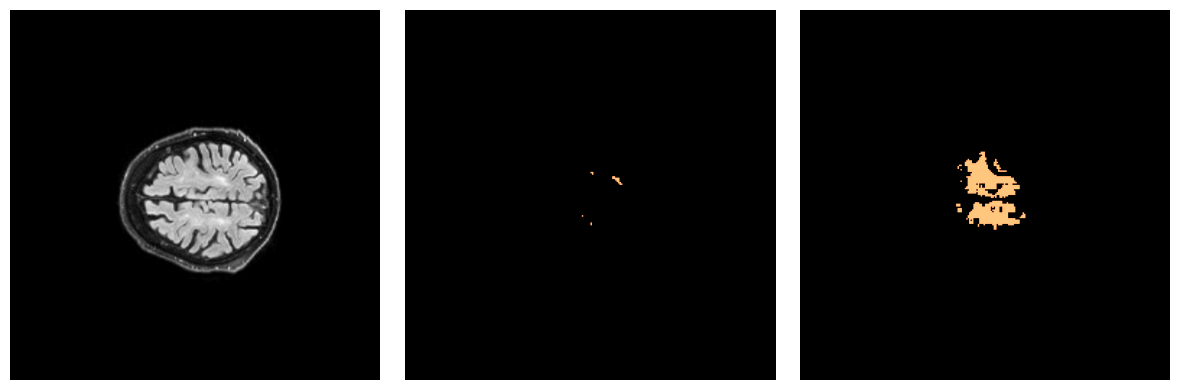

  0%|          | 8/2587 [00:13<45:36,  1.06s/it]

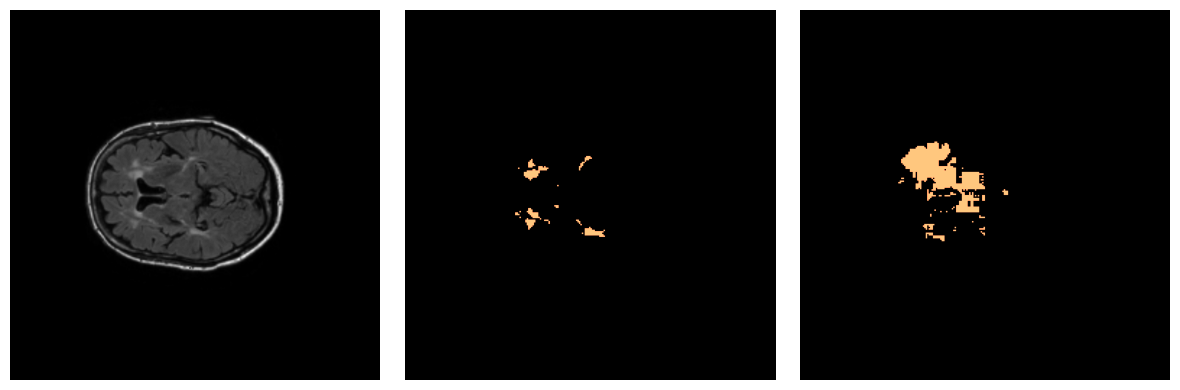

  0%|          | 9/2587 [00:14<44:58,  1.05s/it]

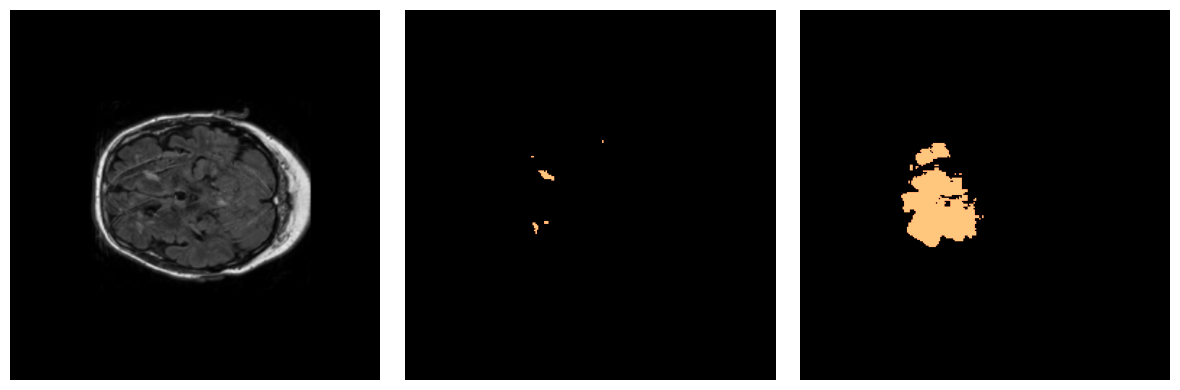

  0%|          | 10/2587 [00:17<1:07:41,  1.58s/it]

In [124]:
with torch.no_grad():
    for batch in tqdm(test_dataloader):

        # forward pass
        outputs = model(pixel_values=batch["pixel_values"].cuda(),
                      input_boxes=batch["input_boxes"].cuda(),
                      multimask_output=False)

        # compute loss
        predicted_masks = outputs.pred_masks.squeeze(1)
        ground_truth_masks = batch["ground_truth_mask"].float().cuda()
        # loss = seg_loss(predicted_masks, ground_truth_masks.unsqueeze(1))

        # outputs = model(pixel_values=batch["pixel_values"],
        #               input_boxes=batch["input_boxes"],
        #               multimask_output=False)

        # # compute loss
        # predicted_masks = outputs.pred_masks.squeeze(1)
        # ground_truth_masks = batch["ground_truth_mask"].float()
       # loss = seg_loss(predicted_masks, ground_truth_masks.unsqueeze(1))

        # apply sigmoid
        medsam_seg_prob = torch.sigmoid(outputs.pred_masks.squeeze(1))
        # convert soft mask to hard mask
        medsam_seg_prob = medsam_seg_prob.cpu().numpy().squeeze()
        medsam_seg = (medsam_seg_prob > 0.5).astype(np.uint8)
        
        plt.figure(figsize=(12,4))
        plt.subplot(1,3,1)
        plt.imshow(batch["pixel_values"][0,1], cmap='gray')
        plt.axis('off')
        plt.subplot(1,3,2)
        plt.imshow(batch["ground_truth_mask"][0], cmap='copper')
        plt.axis('off')
        plt.subplot(1,3,3)
        plt.imshow(medsam_seg, cmap='copper')
        plt.axis('off')
        plt.tight_layout()
        plt.show()
